<a href="https://colab.research.google.com/github/Mano2610/Land_-Registry-NSPL-BNG/blob/main/Land_Registry_Chimnie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [343]:
!pip install geopandas
!python -m pip install statsmodels
!pip install folium

In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [345]:
column_headers = [
    "Transaction_unique_identifier",
    "Price",
    "Date_of_Transfer",
    "Postcode",
    "Property_Type",
    "Old/New",
    "Duration",
    "PAON",
    "SAON",
    "Street",
    "Locality",
    "Town/City",
    "District",
    "County",
    "PPD_Category_Type",
    "Record_Status_monthly_file_only"
]

In [346]:
df_main = pd.read_csv('/content/drive/MyDrive/Chimnie/pp-complete_2.csv',names = column_headers)

In [347]:
df = df_main.copy()

In [348]:
# Convert columns to appropriate datatypes
df['Transaction_unique_identifier'] = df['Transaction_unique_identifier'].astype('string')
df['Price'] = df['Price'].astype('float')
df['Date_of_Transfer'] = pd.to_datetime(df['Date_of_Transfer'])
df['Postcode'] = df['Postcode'].astype('string')
df['Property_Type'] = df['Property_Type'].astype('category')
df['Old/New'] = df['Old/New'].astype('category')
df['Duration'] = df['Duration'].astype('category')
df['PAON'] = df['PAON'].astype('string')
df['SAON'] = df['SAON'].astype('string')
df['Street'] = df['Street'].astype('string')
df['Locality'] = df['Locality'].astype('string')
df['Town/City'] = df['Town/City'].astype('string')
df['District'] = df['District'].astype('string')
df['County'] = df['County'].astype('string')
df['PPD_Category_Type'] = df['PPD_Category_Type'].astype('category')
df['Record_Status_monthly_file_only'] = df['Record_Status_monthly_file_only'].astype('category')

In [349]:
df.isna().sum()

Transaction_unique_identifier             0
Price                                     0
Date_of_Transfer                          0
Postcode                              47285
Property_Type                             0
Old/New                                   0
Duration                                  0
PAON                                   4185
SAON                               25748964
Street                               464236
Locality                           10664889
Town/City                                 0
District                                  0
County                                    0
PPD_Category_Type                         0
Record_Status_monthly_file_only           0
dtype: int64

In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29212384 entries, 0 to 29212383
Data columns (total 16 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   Transaction_unique_identifier    string        
 1   Price                            float64       
 2   Date_of_Transfer                 datetime64[ns]
 3   Postcode                         string        
 4   Property_Type                    category      
 5   Old/New                          category      
 6   Duration                         category      
 7   PAON                             string        
 8   SAON                             string        
 9   Street                           string        
 10  Locality                         string        
 11  Town/City                        string        
 12  District                         string        
 13  County                           string        
 14  PPD_Category_Type               

In [351]:
nspl_df_main = pd.read_csv('/content/drive/MyDrive/Chimnie/NSPL_2021_MAY_2024/Data/NSPL21_MAY_2024_UK.csv')

<ipython-input-351-292522c79619>:1: DtypeWarning:

Columns (26,31) have mixed types. Specify dtype option on import or set low_memory=False.



In [352]:
nspl_df = nspl_df_main.copy()

In [353]:
nspl_df['pcd'] = nspl_df['pcd'].astype('string')
nspl_df['pcd2'] = nspl_df['pcd2'].astype('string')
nspl_df['pcds'] = nspl_df['pcds'].astype('string')
nspl_df['laua'] = nspl_df['laua'].astype('string')
nspl_df['rgn'] = nspl_df['rgn'].astype('string')

In [354]:
nspl_df.isna().sum()

pcd               0
pcd2              0
pcds              0
dointr            0
doterm      1800092
usertype          0
oseast1m      24076
osnrth1m      24076
osgrdind          0
oa21          10959
cty           10959
ced           10953
laua          10959
ward          10959
nhser         10953
ctry          10953
rgn           10959
pcon          10959
ttwa          10953
itl           10953
npark          8192
lsoa21        10959
msoa21        10953
wz11          10953
sicbl         10953
bua22         10959
ru11ind       71023
oac11         10953
lat               0
long              0
lep1          10953
lep2        2666161
pfa           10959
imd               0
icb            7082
dtype: int64

In [355]:
nspl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2703780 entries, 0 to 2703779
Data columns (total 35 columns):
 #   Column    Dtype  
---  ------    -----  
 0   pcd       string 
 1   pcd2      string 
 2   pcds      string 
 3   dointr    int64  
 4   doterm    float64
 5   usertype  int64  
 6   oseast1m  float64
 7   osnrth1m  float64
 8   osgrdind  int64  
 9   oa21      object 
 10  cty       object 
 11  ced       object 
 12  laua      string 
 13  ward      object 
 14  nhser     object 
 15  ctry      object 
 16  rgn       string 
 17  pcon      object 
 18  ttwa      object 
 19  itl       object 
 20  npark     object 
 21  lsoa21    object 
 22  msoa21    object 
 23  wz11      object 
 24  sicbl     object 
 25  bua22     object 
 26  ru11ind   object 
 27  oac11     object 
 28  lat       float64
 29  long      float64
 30  lep1      object 
 31  lep2      object 
 32  pfa       object 
 33  imd       int64  
 34  icb       object 
dtypes: float64(5), int64(4), object

In [356]:
# Remove all spaces in the 'pcd', 'pcd2', and 'pcds' columns
nspl_df['pcd'] = nspl_df['pcd'].str.replace(r'\s+', '', regex=True)
nspl_df['pcd2'] = nspl_df['pcd2'].str.replace(r'\s+', '', regex=True)
nspl_df['pcds'] = nspl_df['pcds'].str.replace(r'\s+', '', regex=True)

In [357]:
len(nspl_df[(nspl_df['pcd'] == nspl_df['pcd2']) & (nspl_df['pcd2'] == nspl_df['pcds'])])

2703780

# Exercise 2


In [358]:
london_boroughs = nspl_df[nspl_df['laua'].str.startswith('E09')]

In [359]:
len(london_boroughs)

329934

In [360]:
df['Postcode'] = df['Postcode'].str.replace(r'\s+', '', regex=True)

In [361]:
df_2023 = df[df['Date_of_Transfer'].dt.year == 2023]

# Merge with NSPL dataset to get borough information
filtered_df_2023 = df_2023[df_2023['Postcode'].isin(london_boroughs['pcd'])]


In [362]:
borough_sales = filtered_df_2023.groupby('District').agg(
    Sales_Count=('Price', 'size'),
    Average_Price=('Price', 'mean')
).reset_index()

In [363]:
borough_sales['District'] = borough_sales['District'].replace('CITY OF WESTMINSTER', 'WESTMINSTER')

borough_sales

District  Sales_Count  Average_Price
0     BARKING AND DAGENHAM         1354   3.962896e+05
1                   BARNET         3217   8.067403e+05
2                   BEXLEY         2538   4.330332e+05
3                    BRENT         1858   6.609064e+05
4                  BROMLEY         3736   6.036037e+05
5                   CAMDEN         1917   1.491554e+06
6           CITY OF LONDON          200   4.425014e+06
7              WESTMINSTER         2637   2.366354e+06
8                  CROYDON         3708   4.815073e+05
9                   EALING         2800   7.334151e+05
10               ELMBRIDGE            3   4.866667e+05
11                 ENFIELD         2423   6.012264e+05
12           EPPING FOREST            1   2.950000e+05
13         EPSOM AND EWELL            2   7.350000e+05
14               GREENWICH         2377   5.389321e+05
15                 HACKNEY         2012   7.347810e+05
16  HAMMERSMITH AND FULHAM         2081   9.959539e+05
17                HARINGEY         2125   8.172804e+05
18                  HARROW         1812   5.921231e+05
19                HAVERING         2848   4.751487e+05
20              HILLINGDON         2662   5.477167e+05
21                HOUNSLOW         1872   6.848226e+05
22               ISLINGTON         1900   1.047488e+06
23  KENSINGTON AND CHELSEA         1884   2.553704e+06
24    KINGSTON UPON THAMES         1828   7.452819e+05
25                 LAMBETH         3217   6.799319e+05
26                LEWISHAM         2718   5.307422e+05
27                  MERTON         2136   7.098418e+05
28                  NEWHAM         1703   5.011942e+05
29               REDBRIDGE         2193   5.472397e+05
30    RICHMOND UPON THAMES         2389   9.536759e+05
31               SEVENOAKS            1   5.870000e+05
32               SOUTHWARK         2560   7.220322e+05
33                  SUTTON         2273   4.928900e+05
34           TOWER HAMLETS         2388   8.420487e+05
35          WALTHAM FOREST         2520   5.869080e+05
36              WANDSWORTH         4365   8.412124e+05

In [364]:
gdf = gpd.read_file('/content/drive/MyDrive/Chimnie/london_boroughs.geojson')

In [365]:
gdf['name'] = gdf['name'].str.upper()
gdf

name color  \
0     BARKING AND DAGENHAM  blue   
1                   BARNET  blue   
2                   BEXLEY  blue   
3                    BRENT  blue   
4                  BROMLEY  blue   
5                   CAMDEN  blue   
6           CITY OF LONDON  blue   
7                  CROYDON  blue   
8                   EALING  blue   
9                  ENFIELD  blue   
10               GREENWICH  blue   
11                 HACKNEY  blue   
12  HAMMERSMITH AND FULHAM  blue   
13                HARINGEY  blue   
14                  HARROW  blue   
15                HAVERING  blue   
16              HILLINGDON  blue   
17                HOUNSLOW  blue   
18               ISLINGTON  blue   
19  KENSINGTON AND CHELSEA  blue   
20    KINGSTON UPON THAMES  blue   
21                 LAMBETH  blue   
22                LEWISHAM  blue   
23                  MERTON  blue   
24                  NEWHAM  blue   
25               REDBRIDGE  blue   
26    RICHMOND UPON THAMES  blue   
27               SOUTHWARK  blue   
28                  SUTTON  blue   
29           TOWER HAMLETS  blue   
30          WALTHAM FOREST  blue   
31              WANDSWORTH  blue   
32             WESTMINSTER  blue   

                                             geometry  
0   POLYGON ((0.18859 51.55387, 0.18831 51.55402, ...  
1   POLYGON ((-0.28515 51.63711, -0.28516 51.6371,...  
2   POLYGON ((0.13418 51.51493, 0.13367 51.51502, ...  
3   POLYGON ((-0.26549 51.59886, -0.2657 51.59904,...  
4   POLYGON ((-0.00337 51.34686, -0.00302 51.34593...  
5   POLYGON ((-0.14237 51.5693, -0.14237 51.56931,...  
6   POLYGON ((-0.08528 51.52015, -0.08571 51.51946...  
7   POLYGON ((0 51.32889, 0.00005 51.32891, 0.0011...  
8   POLYGON ((-0.37893 51.55427, -0.37905 51.55422...  
9   POLYGON ((-0.01214 51.68092, -0.01397 51.68099...  
10  POLYGON ((0.0747 51.4322, 0.07523 51.43248, 0....  
11  POLYGON ((-0.09569 51.5737, -0.09608 51.57375,...  
12  POLYGON ((-0.22868 51.53049, -0.22881 51.53041...  
13  POLYGON ((-0.09581 51.6093, -0.09601 51.60929,...  
14  POLYGON ((-0.30456 51.63641, -0.30451 51.63649...  
15  POLYGON ((0.1594 51.51474, 0.15928 51.51436, 0...  
16  POLYGON ((-0.37695 51.52422, -0.37662 51.52448...  
17  POLYGON ((-0.37815 51.49648, -0.37908 51.49616...  
18  POLYGON ((-0.1046 51.56482, -0.10486 51.56469,...  
19  POLYGON ((-0.21636 51.52811, -0.21663 51.52823...  
20  POLYGON ((-0.30069 51.34648, -0.30066 51.34655...  
21  POLYGON ((-0.08897 51.43092, -0.08926 51.43182...  
22  POLYGON ((0 51.41763, 0.00001 51.41763, 0.0000...  
23  POLYGON ((-0.14064 51.41913, -0.14092 51.419, ...  
24  POLYGON ((0.06843 51.54455, 0.06852 51.54477, ...  
25  POLYGON ((0.09404 51.54604, 0.09413 51.54607, ...  
26  POLYGON ((-0.37742 51.44244, -0.37736 51.44245...  
27  POLYGON ((-0.08021 51.50688, -0.08062 51.50696...  
28  POLYGON ((-0.21846 51.34666, -0.21836 51.34645...  
29  POLYGON ((0 51.50632, 0.00005 51.50633, 0.0005...  
30  POLYGON ((0.0222 51.62946, 0.02255 51.62982, 0...  
31  POLYGON ((-0.13947 51.41989, -0.13901 51.42021...  
32  POLYGON ((-0.11164 51.51535, -0.11166 51.51532...

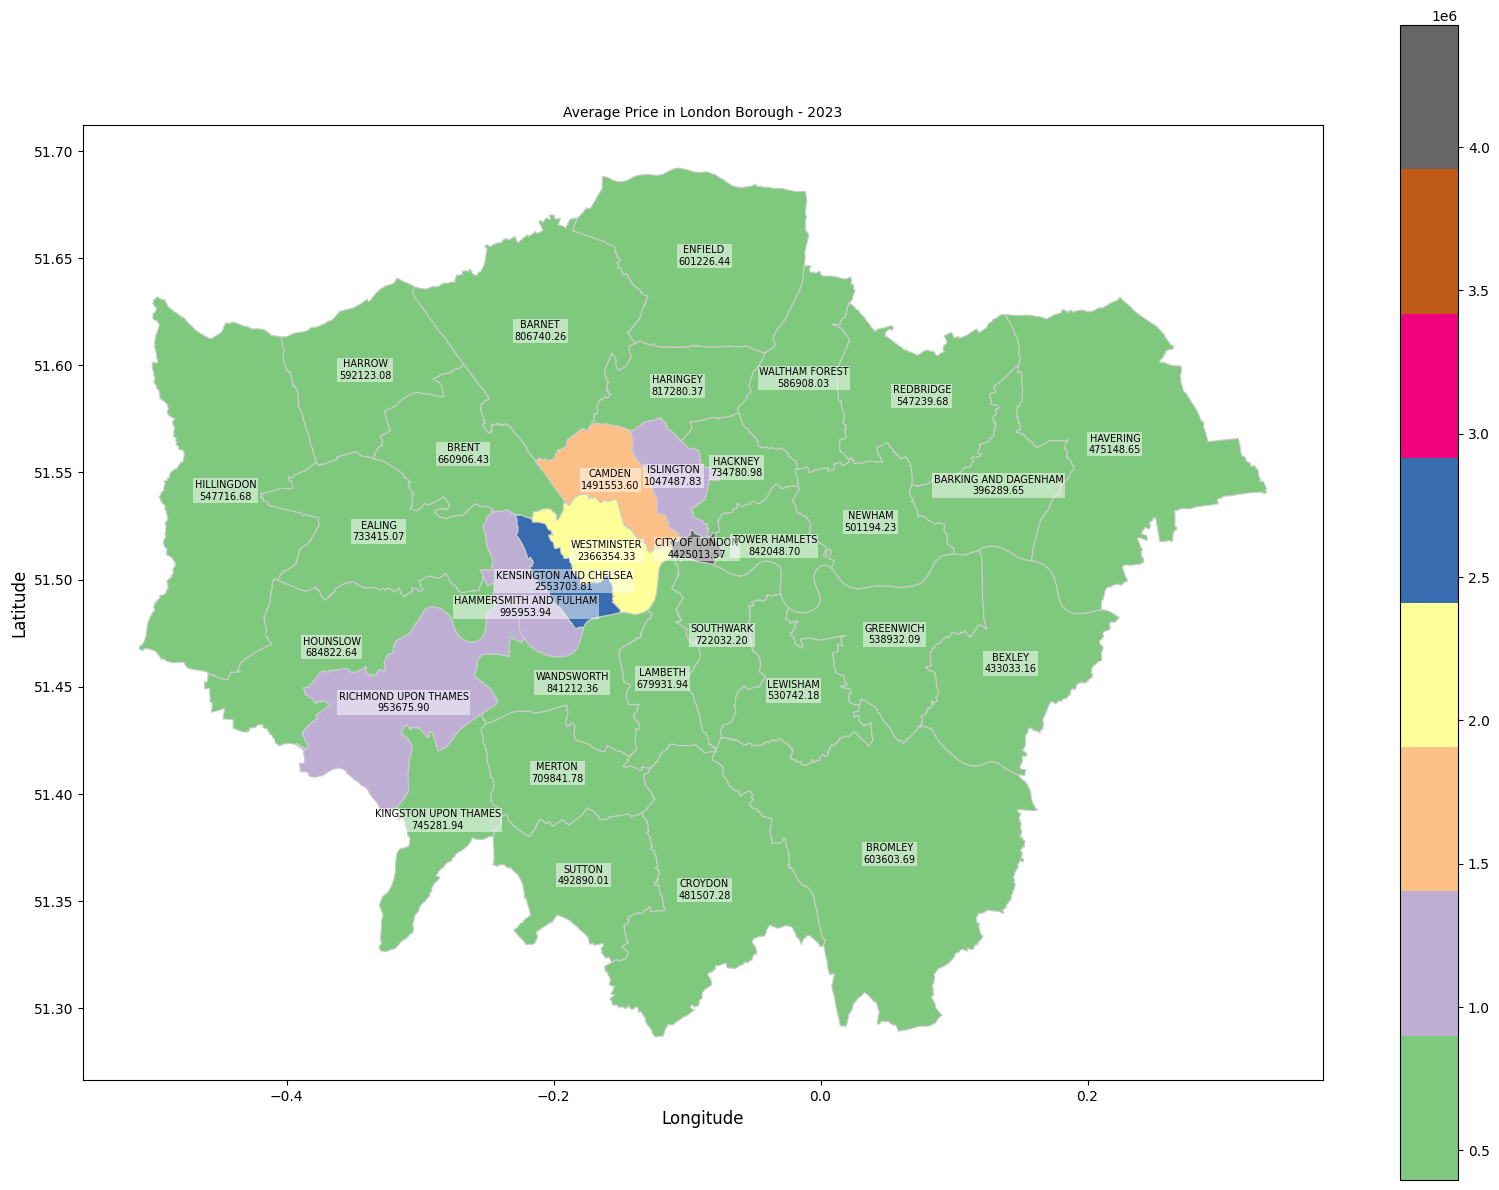

In [366]:
merged_gdf = gdf.set_index('name').join(borough_sales.set_index('District'))

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
merged_gdf.plot(column='Average_Price', cmap='Accent', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add titles and labels
ax.set_title('Average Price in London Borough - 2023', fontdict={'fontsize': '10', 'fontweight': '5'})
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)


offsets = {
    'KENSINGTON AND CHELSEA': (0, -3),
    'HAMMERSMITH AND FULHAM': (0, -12)
}
for idx, row in merged_gdf.iterrows():
    offset = offsets.get(row.name, (0, 0))
    plt.annotate(
        text=f"{row.name}\n{row.Average_Price:.2f}",
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        xytext=offset,
        textcoords='offset points',
        ha='center',
        va='center',
        fontsize=7,
        color='black',
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=1)  # Optional for better readability
    )

plt.show()

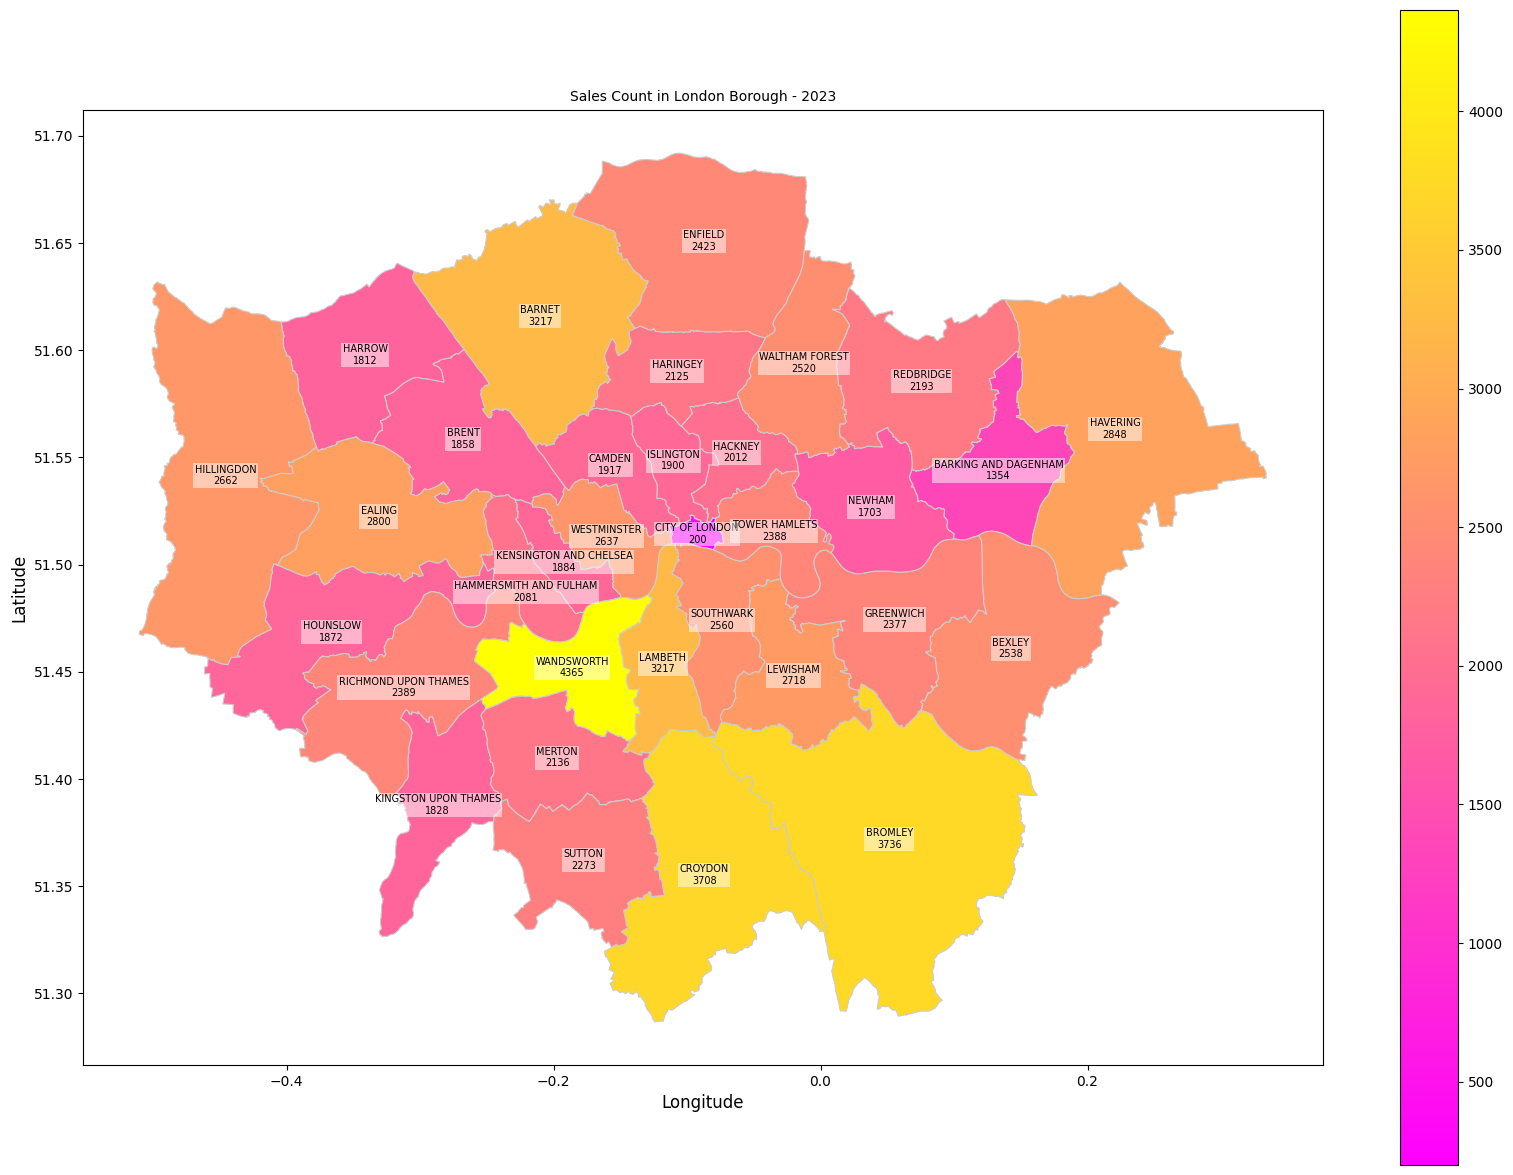

In [367]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
merged_gdf.plot(column='Sales_Count', cmap='spring', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Sales Count in London Borough - 2023', fontdict={'fontsize': '10', 'fontweight': '5'})
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)


offsets = {
    'HAMMERSMITH AND FULHAM': (0, -12)
}
for idx, row in merged_gdf.iterrows():
    offset = offsets.get(row.name, (0, 0))
    plt.annotate(
        text=f"{row.name}\n{row.Sales_Count}",
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        xytext=offset,
        textcoords='offset points',
        ha='center',
        va='center',
        fontsize=7,
        color='black',
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=1)  # Optional for better readability
    )


plt.show()

# Exercise 3


In [368]:
#filter year from 2020
df_from_2020 = df[df['Date_of_Transfer'].dt.year >= 2020]

#filter Property_Type as 'F' (Flat) and it should be new
df_from_2020 = df_from_2020[(df_from_2020['Property_Type'] == 'F') & (df_from_2020['Old/New'] == 'Y')]


In [369]:
df_from_2020.describe()

Price               Date_of_Transfer
count  1.044190e+05                         104419
mean   4.416462e+05  2021-08-04 11:11:13.773930240
min    1.874200e+04            2020-01-01 00:00:00
25%    2.058000e+05            2020-11-12 00:00:00
50%    3.140000e+05            2021-06-30 00:00:00
75%    4.950000e+05            2022-04-28 00:00:00
max    1.109000e+08            2024-04-25 00:00:00
std    9.204355e+05                            NaN

In [370]:
region_df = nspl_df.copy()
region_df = region_df.dropna(subset=['rgn'])

def determine_region(rgn):
    if rgn.startswith('E12'):
        return 'England'
    elif rgn.startswith('W'):
        return 'Wales'
    elif rgn.startswith('S'):
        return 'Scotland'
    elif rgn.startswith('N'):
        return 'Northern Ireland'
    elif rgn.startswith('L'):
        return 'Channel Islands'
    elif rgn.startswith('M'):
        return 'Isle of Man'
    else:
        return 'Unknown'

# Apply the function to the 'rgn' column to create the 'Region' column
region_df['Region'] = region_df['rgn'].apply(determine_region)

In [371]:
region_df_from_2020 = df_from_2020.merge(region_df, left_on='Postcode', right_on='pcd', how='left')

In [372]:
region_df_from_2020['Region'].value_counts()

Region
England    102953
Wales        1249
Name: count, dtype: int64

Postcode lookup has 6 Regions:
England

1.   England
2.   Wales

1.   Scotland
2.   Northern Ireland

1.   Channel Islands
2.   Isle of Man

But the Price Paid Data contains only the property sales in **England** and **Wales**

In [373]:
region_sales = region_df_from_2020.groupby('Region').agg(
    New_Build_Flats_Sold=('Transaction_unique_identifier', 'count')
).reset_index()

print(region_sales)

    Region  New_Build_Flats_Sold
0  England                102953
1    Wales                  1249


In [374]:
region_df_from_2020['Region'].value_counts()

Region
England    102953
Wales        1249
Name: count, dtype: int64

# Exercise 4

In [375]:
df_2020_onwards = df[df['Date_of_Transfer'] >= '2020-01-01']

df_2020_onwards['Week'] = df_2020_onwards['Date_of_Transfer'].dt.to_period('W').astype(str)


<ipython-input-375-01ec82410c18>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [376]:
# Count the number of sales per week
weekly_sales = df_2020_onwards.groupby('Week').size().reset_index(name='Sales_Count')

In [377]:
weekly_sales['Week'].nunique()

231

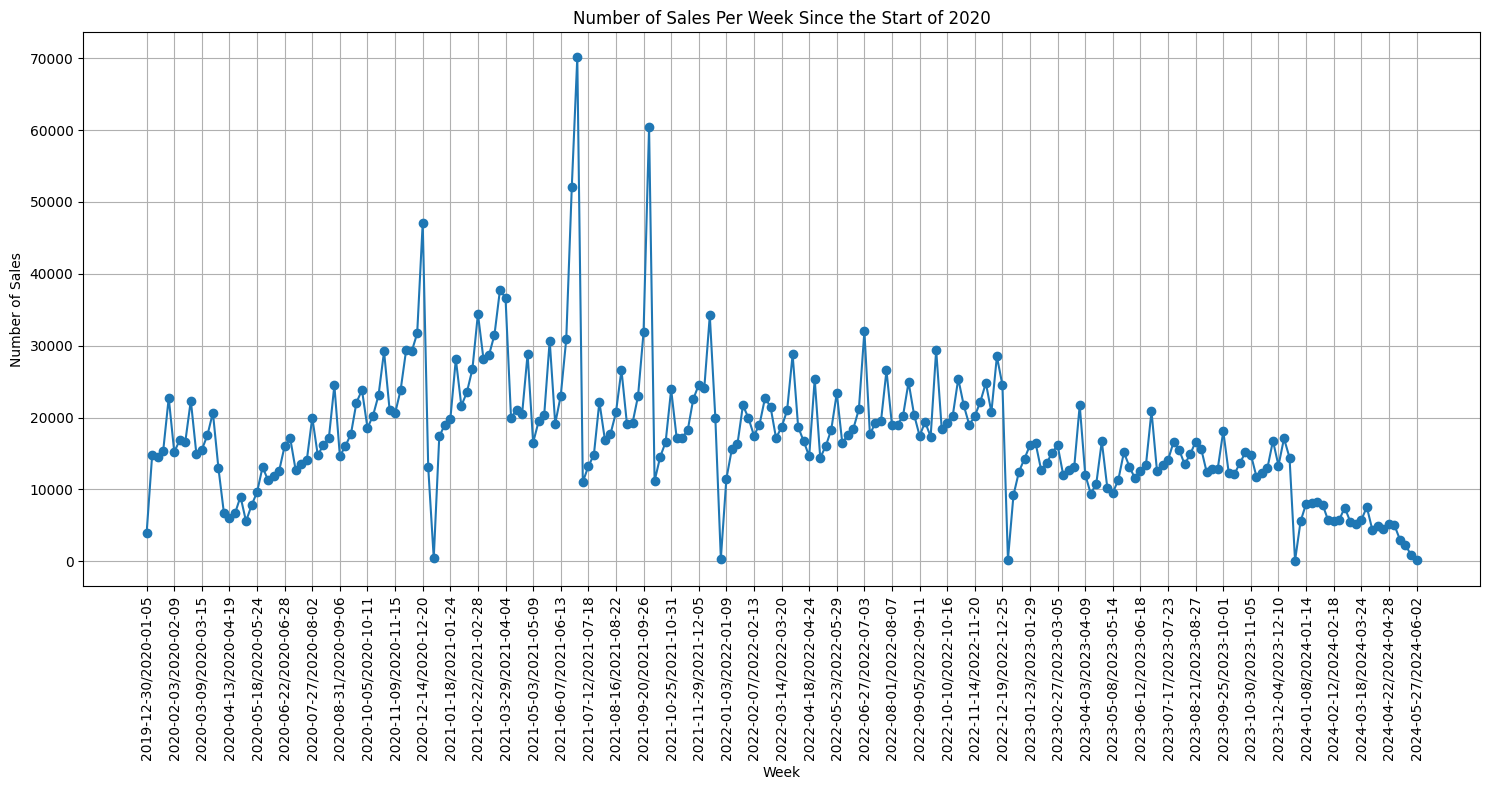

In [378]:
# Plot a line chart of sales per week
plt.figure(figsize=(15, 8))
plt.plot(weekly_sales['Week'], weekly_sales['Sales_Count'], marker='o')
plt.title('Number of Sales Per Week Since the Start of 2020')
plt.xlabel('Week')
plt.ylabel('Number of Sales')

# Set x-ticks at intervals
num_weeks = len(weekly_sales['Week'])
plt.xticks(weekly_sales['Week'][::5], rotation=90)  # Adjust interval as needed

plt.grid(True)
plt.tight_layout()
plt.show()


In [379]:
avg_price_per_week = df_2020_onwards.groupby('Week')['Price'].mean().reset_index(name='Average_Price')

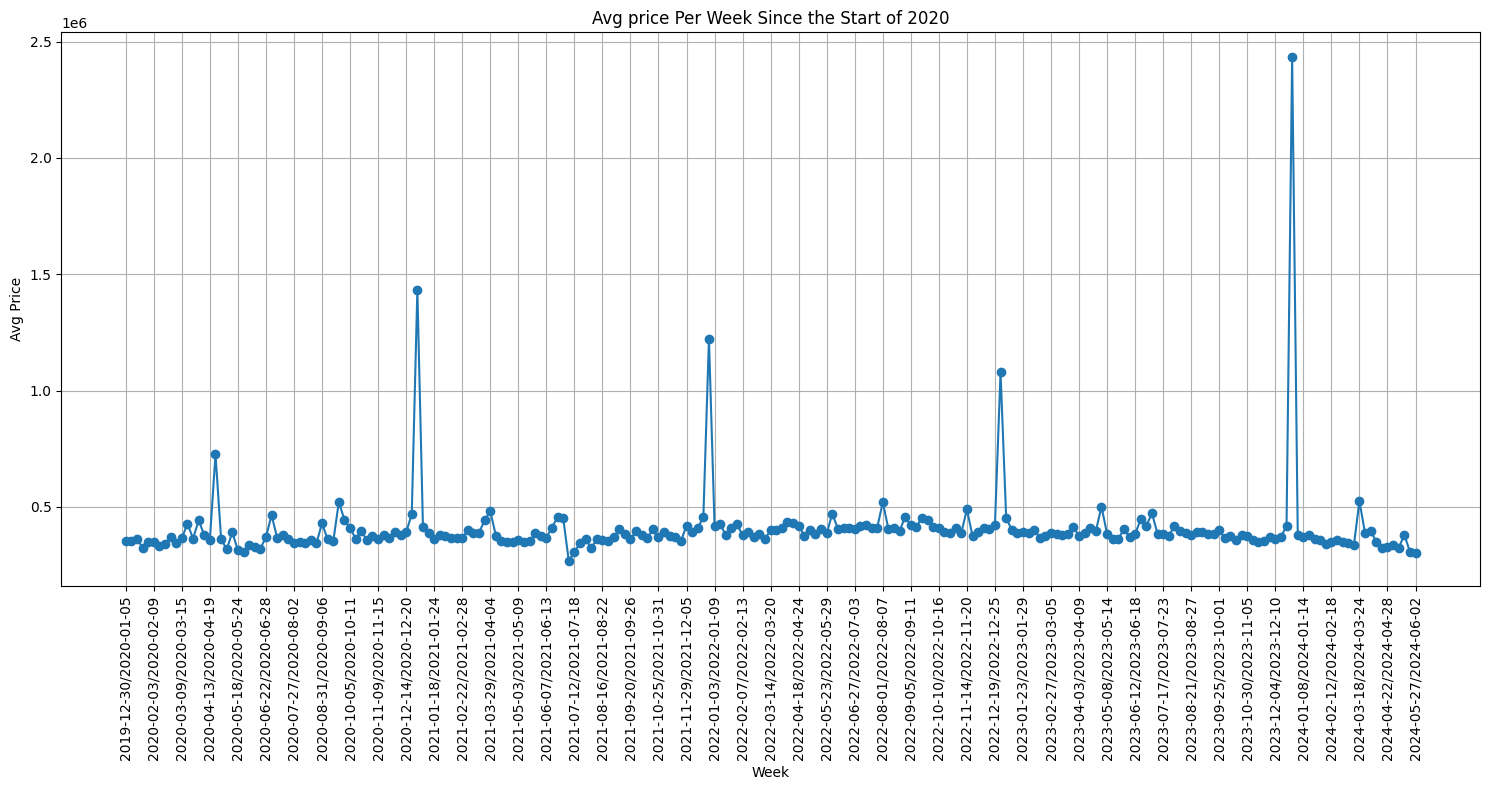

In [380]:
# Plot a line chart of sales per week
plt.figure(figsize=(15, 8))
plt.plot(avg_price_per_week['Week'], avg_price_per_week['Average_Price'], marker='o')
plt.title('Avg price Per Week Since the Start of 2020')
plt.xlabel('Week')
plt.ylabel('Avg Price')

# Set x-ticks at intervals
num_weeks = len(weekly_sales['Week'])
plt.xticks(weekly_sales['Week'][::5], rotation=90)  # Adjust interval as needed

plt.grid(True)
plt.tight_layout()
plt.show()


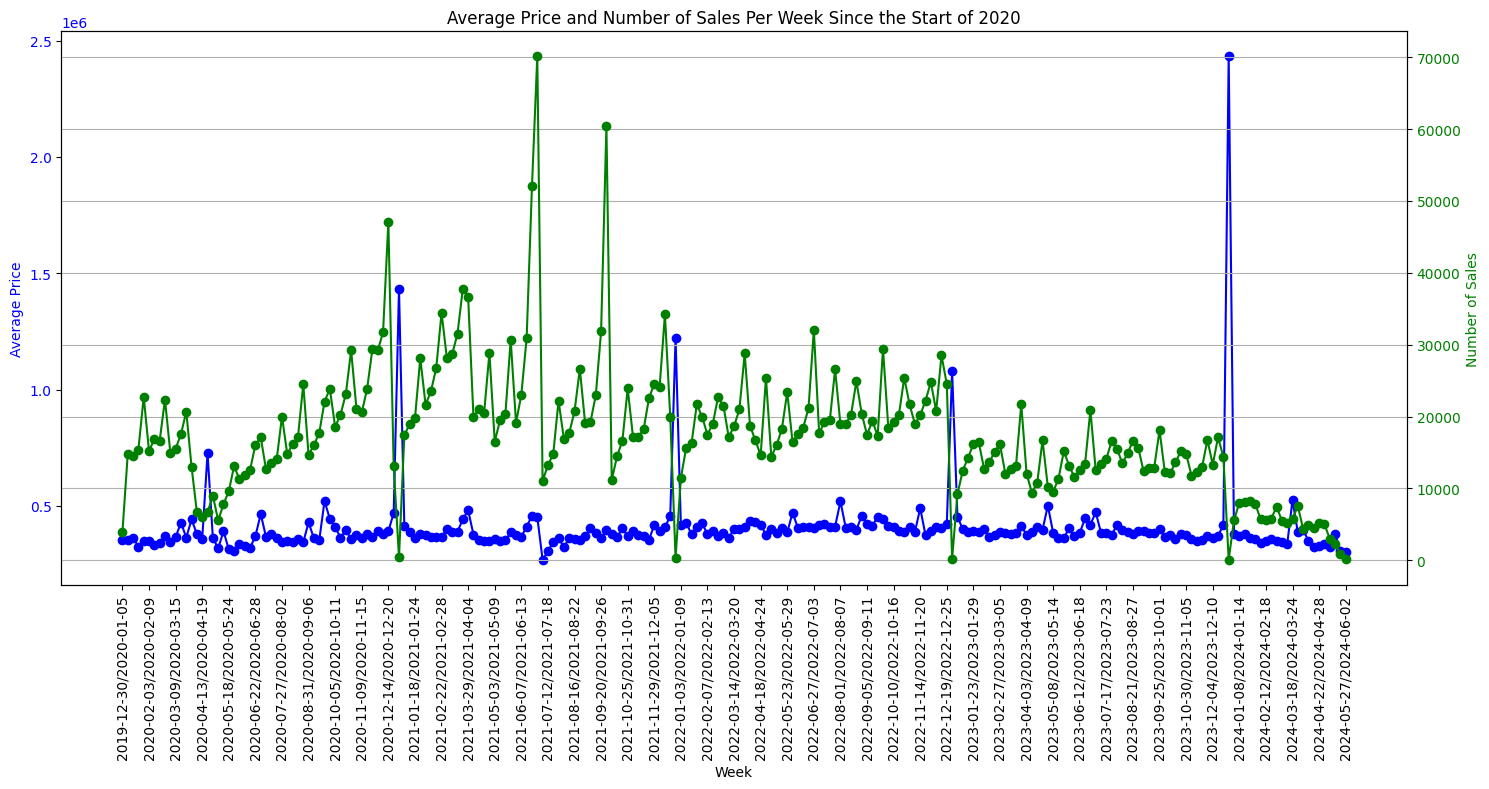

In [381]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot the average price per week on the left y-axis
ax1.plot(avg_price_per_week['Week'], avg_price_per_week['Average_Price'], marker='o', color='blue', label='Average Price')
ax1.set_xlabel('Week')
ax1.set_ylabel('Average Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Set x-ticks at intervals
ax1.set_xticks(avg_price_per_week['Week'][::5])
ax1.set_xticklabels(avg_price_per_week['Week'][::5], rotation=90)  # Adjust interval as needed

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
ax2.plot(weekly_sales['Week'], weekly_sales['Sales_Count'], marker='o', color='green', label='Number of Sales')
ax2.set_ylabel('Number of Sales', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Set title and layout
plt.title('Average Price and Number of Sales Per Week Since the Start of 2020')
fig.tight_layout()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


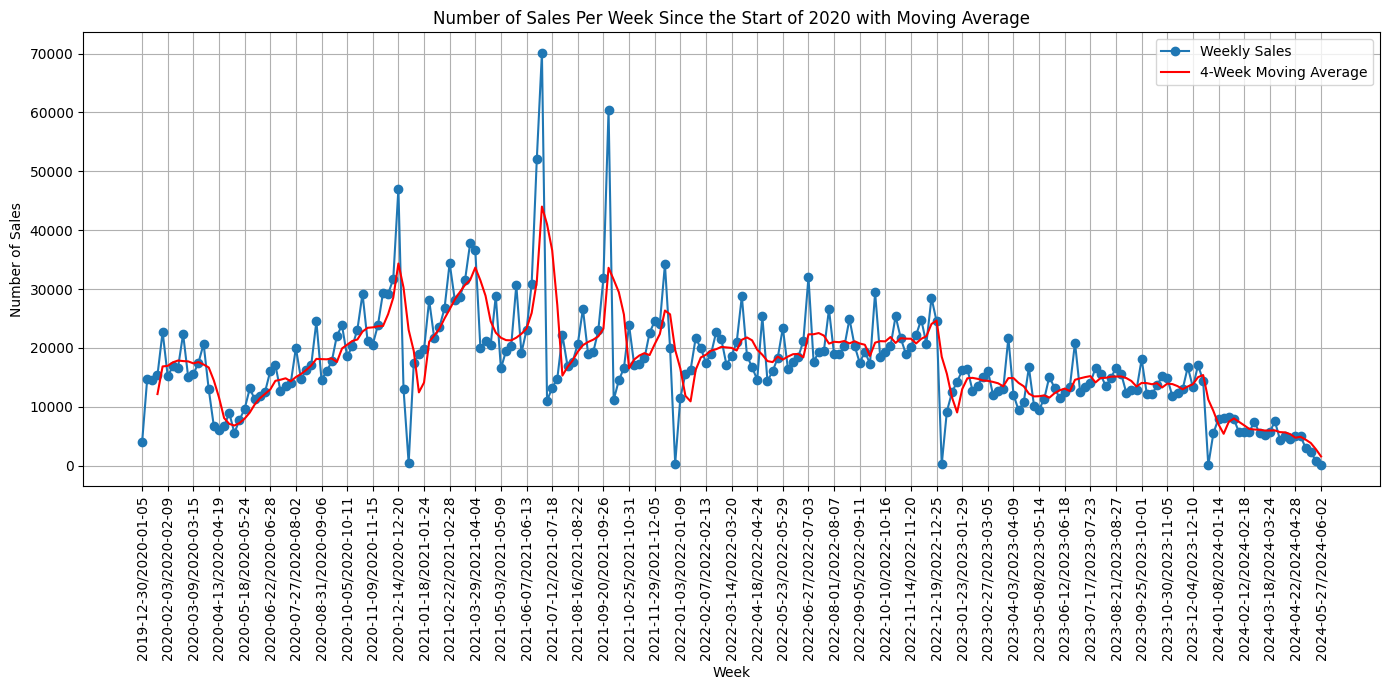

In [382]:
# Calculate the moving average
weekly_sales['Sales_MA'] = weekly_sales['Sales_Count'].rolling(window=4).mean()

# Plot the data with moving average
plt.figure(figsize=(14, 7))
plt.plot(weekly_sales['Week'], weekly_sales['Sales_Count'], marker='o', label='Weekly Sales')
plt.plot(weekly_sales['Week'], weekly_sales['Sales_MA'], color='red', label='4-Week Moving Average')
plt.title('Number of Sales Per Week Since the Start of 2020 with Moving Average')
plt.xlabel('Week')
plt.ylabel('Number of Sales')
plt.xticks(weekly_sales['Week'][::5], rotation=90)  # Adjust interval as needed
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


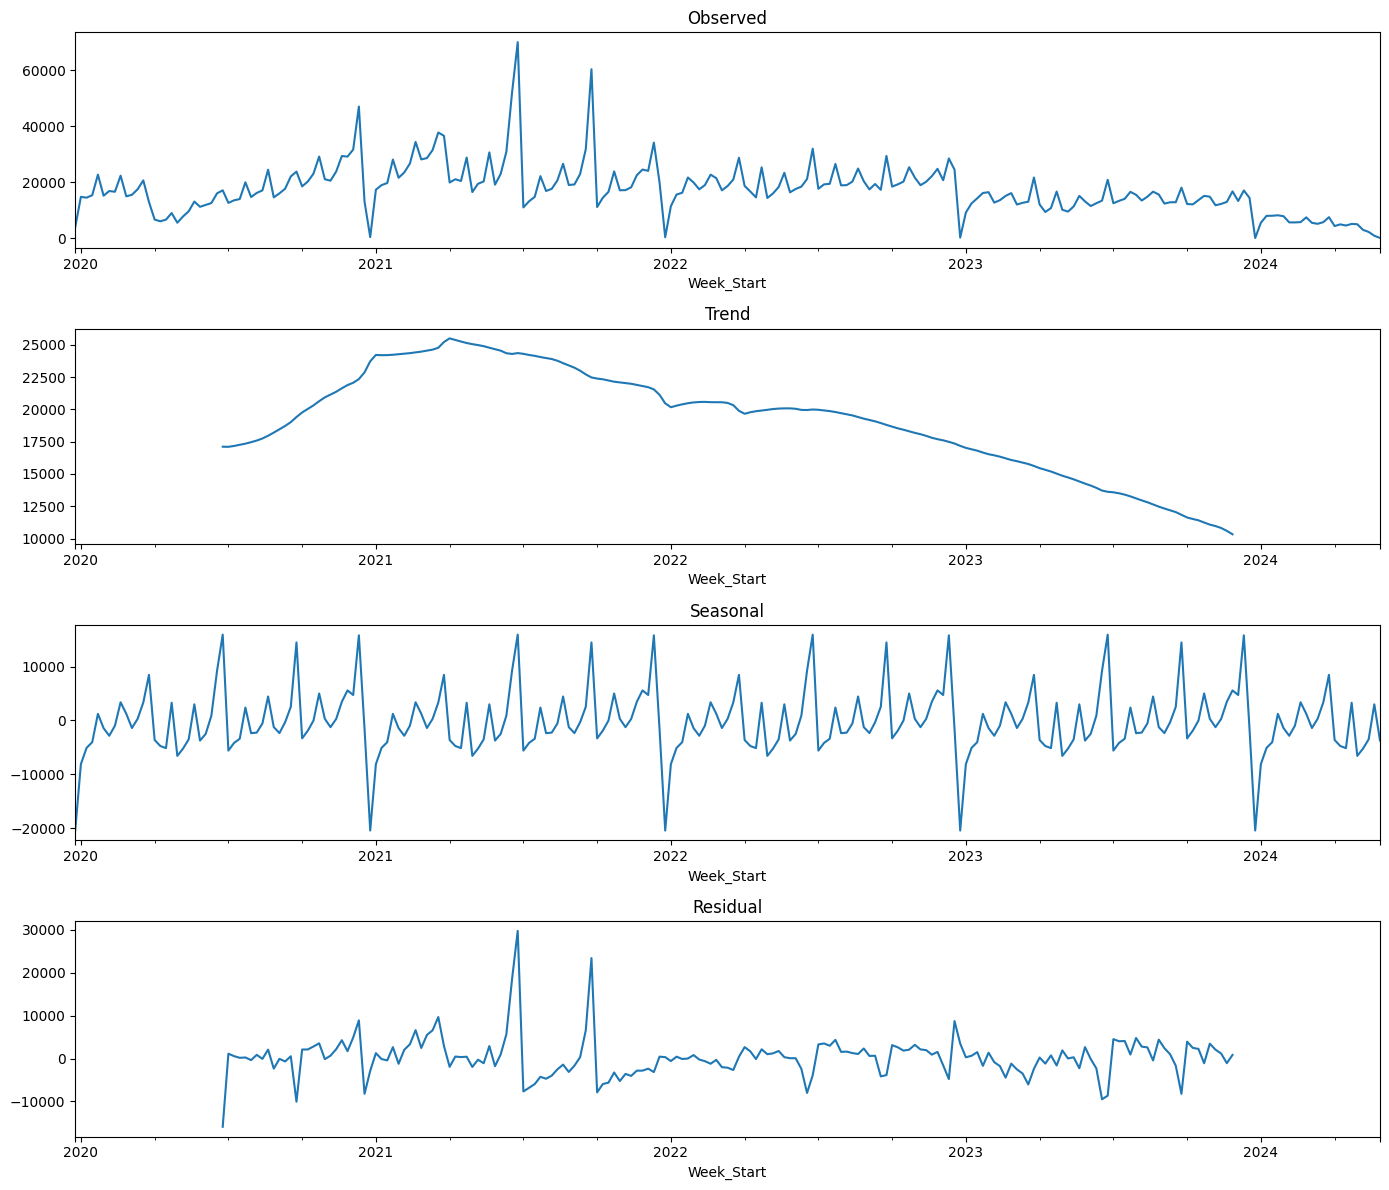

In [383]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert 'Week' to datetime format for decomposition
weekly_sales['Week_Start'] = pd.to_datetime(weekly_sales['Week'].apply(lambda x: x.split('/')[0]))

# Perform seasonal decomposition
decomposition = seasonal_decompose(weekly_sales.set_index('Week_Start')['Sales_Count'], model='additive', period=52)

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 12))
decomposition.observed.plot(ax=ax1, title='Observed')
decomposition.trend.plot(ax=ax2, title='Trend')
decomposition.seasonal.plot(ax=ax3, title='Seasonal')
decomposition.resid.plot(ax=ax4, title='Residual')
plt.tight_layout()
plt.show()


In [384]:
backup_weekly_sales= weekly_sales.copy()

# Exercise 5


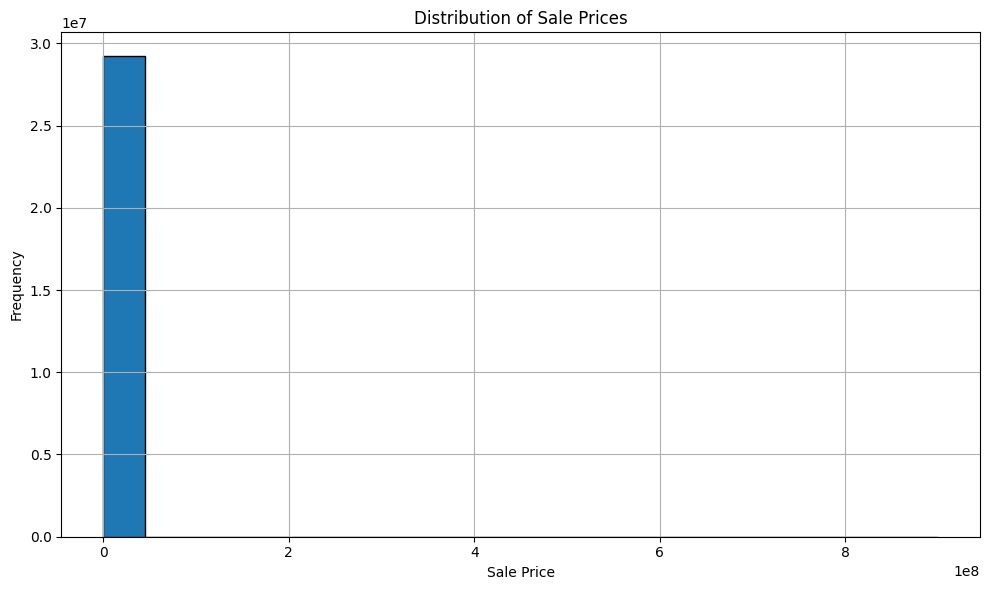

In [385]:
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=20, edgecolor='black')
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [386]:
import numpy as np

# Calculate statistics
mean_price = np.mean(df['Price'])
median_price = np.median(df['Price'])
std_dev_price = np.std(df['Price'])
range_price = np.ptp(df['Price'])
skewness = df['Price'].skew()
kurtosis = df['Price'].kurt()

# Print the statistics
print(f'Mean Sale Price: {mean_price}')
print(f'Median Sale Price: {median_price}')
print(f'Standard Deviation of Sale Prices: {std_dev_price}')
print(f'Range of Sale Prices: {range_price}')
print(f'Skewness of Sale Prices: {skewness}')
print(f'Kurtosis of Sale Prices: {kurtosis}')


Mean Sale Price: 224513.8035481459
Median Sale Price: 151000.0
Standard Deviation of Sale Prices: 957734.6341288602
Range of Sale Prices: 899999999.0
Skewness of Sale Prices: 213.6365302853113
Kurtosis of Sale Prices: 93563.89947618468


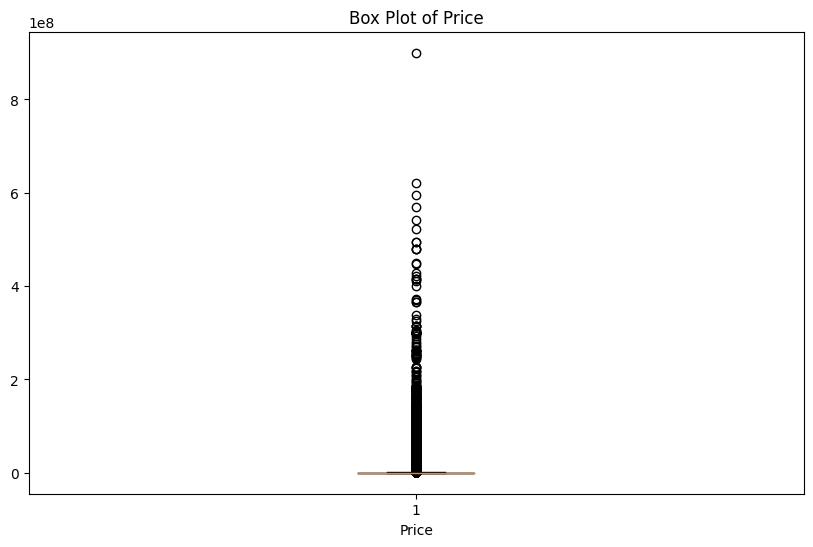

In [387]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['Price'])
plt.title('Box Plot of Price')
plt.xlabel('Price')
plt.show()

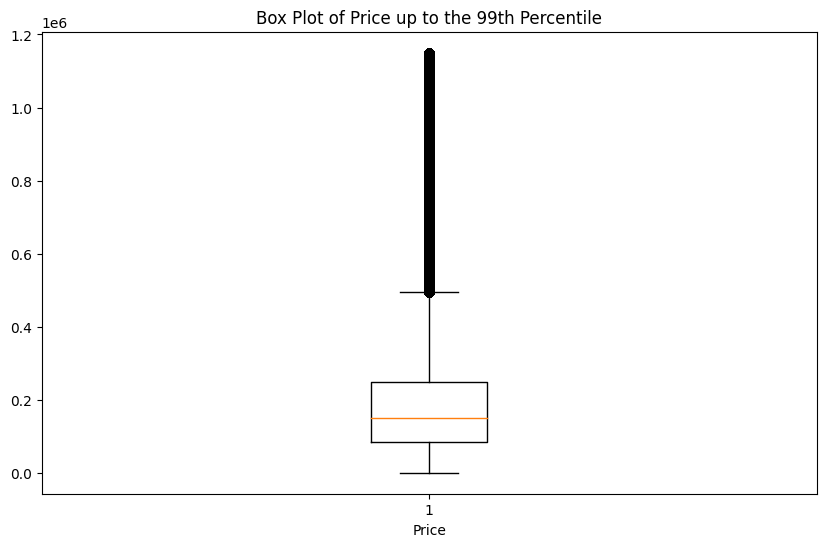

In [388]:
price_99_percentile = df['Price'].quantile(0.99)

# Filter the DataFrame to include only data up to the 99th percentile
filtered_df = df[df['Price'] <= price_99_percentile]

# Plot the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(filtered_df['Price'])
plt.title('Box Plot of Price up to the 99th Percentile')
plt.xlabel('Price')
plt.show()

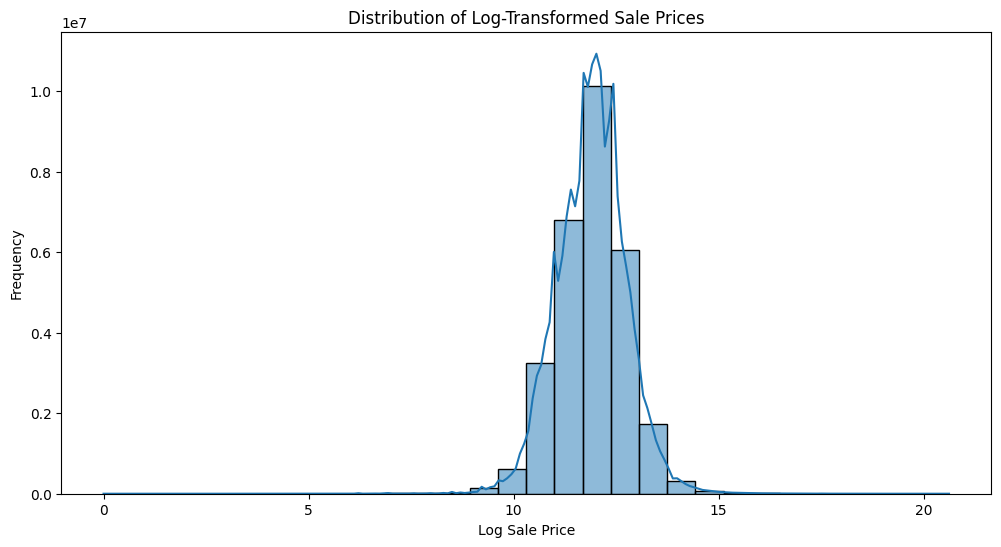

In [389]:
# Apply log transformation to Sale_Price
df['Log_Sale_Price'] = np.log(df['Price'])

plt.figure(figsize=(12, 6))
sns.histplot(df['Log_Sale_Price'], kde=True, bins=30)
plt.title('Distribution of Log-Transformed Sale Prices')
plt.xlabel('Log Sale Price')
plt.ylabel('Frequency')
plt.show()

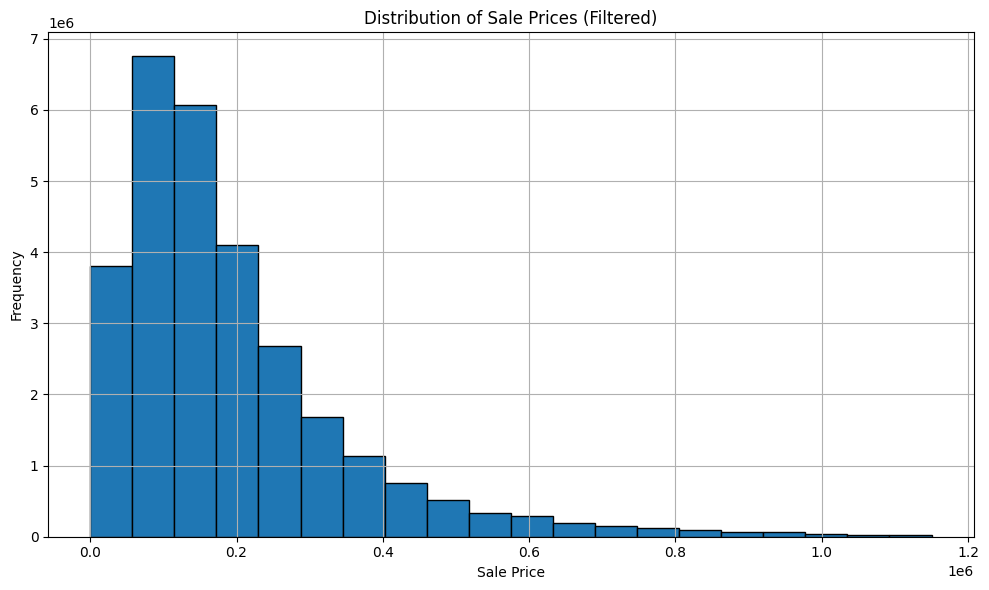

In [390]:
# Define a threshold to identify outliers (e.g., values above the 99th percentile)
threshold = df['Price'].quantile(0.99)
df_filtered = df[df['Price'] < threshold]

# Plot the histogram of the filtered sale prices
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['Price'], bins=20, edgecolor='black')
plt.title('Distribution of Sale Prices (Filtered)')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


In [391]:
import numpy as np

# Log-Transformed Data Analysis
mean_log_price = np.mean(df['Log_Sale_Price'])
median_log_price = np.median(df['Log_Sale_Price'])
std_dev_log_price = np.std(df['Log_Sale_Price'])
skewness_log = df['Log_Sale_Price'].skew()
kurtosis_log = df['Log_Sale_Price'].kurt()

print(f'Mean Log Sale Price: {mean_log_price}')
print(f'Median Log Sale Price: {median_log_price}')
print(f'Standard Deviation of Log Sale Prices: {std_dev_log_price}')
print(f'Skewness of Log Sale Prices: {skewness_log}')
print(f'Kurtosis of Log Sale Prices: {kurtosis_log}')

# Filtered Data Analysis
mean_filtered_price = np.mean(df_filtered['Price'])
median_filtered_price = np.median(df_filtered['Price'])
std_dev_filtered_price = np.std(df_filtered['Price'])
skewness_filtered = df_filtered['Price'].skew()
kurtosis_filtered = df_filtered['Price'].kurt()

print(f'Mean Filtered Sale Price: {mean_filtered_price}')
print(f'Median Filtered Sale Price: {median_filtered_price}')
print(f'Standard Deviation of Filtered Sale Prices: {std_dev_filtered_price}')
print(f'Skewness of Filtered Sale Prices: {skewness_filtered}')
print(f'Kurtosis of Filtered Sale Prices: {kurtosis_filtered}')


Mean Log Sale Price: 11.902883497381735
Median Log Sale Price: 11.92503511579706
Standard Deviation of Log Sale Prices: 0.8505586009231729
Skewness of Log Sale Prices: -0.0627459924694103
Kurtosis of Log Sale Prices: 1.891632750565266
Mean Filtered Sale Price: 194182.39810314812
Median Filtered Sale Price: 150000.0
Standard Deviation of Filtered Sale Prices: 160131.6073218209
Skewness of Filtered Sale Prices: 2.037012582983167
Kurtosis of Filtered Sale Prices: 5.520540783183728


# Exercise 6 & 7


In [392]:
gdf1 = gpd.read_file('/content/drive/MyDrive/Chimnie/OSGB_Grids-master/GeoJSON/OSGB_Grid_10km.geojson')

In [393]:
gdf1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2883 entries, 0 to 2882
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   TILE_NAME  2883 non-null   object  
 1   25K        2883 non-null   object  
 2   ENGLAND    2883 non-null   object  
 3   SCOTLAND   2883 non-null   object  
 4   WALES      2883 non-null   object  
 5   geometry   2883 non-null   geometry
dtypes: geometry(1), object(5)
memory usage: 135.3+ KB


In [394]:
print(gdf1.crs)

EPSG:4326


In [395]:
gdf1.head()

TILE_NAME 25K ENGLAND SCOTLAND WALES  \
0      HP40   t       f        t     f   
1      HP50   t       f        t     f   
2      HP51   t       f        t     f   
3      HP60   t       f        t     f   
4      HP61   t       f        t     f   

                                            geometry  
0  POLYGON ((-1.26961 60.68122, -1.26757 60.771, ...  
1  POLYGON ((-1.08658 60.6801, -1.08403 60.76987,...  
2  POLYGON ((-1.08403 60.76987, -1.08146 60.85964...  
3  POLYGON ((-0.90356 60.67873, -0.9005 60.76849,...  
4  POLYGON ((-0.9005 60.76849, -0.89742 60.85826,...

In [396]:
first_geometry = gdf1.loc[0, 'geometry']
print(f"Geometry Type: {first_geometry.geom_type}")
print(f"Geometry Coordinates: {first_geometry}")

# Loop through the first few geometries and print their types and coordinates
print(gdf1.loc[0, 'geometry'].__geo_interface__)


Geometry Type: Polygon
Geometry Coordinates: POLYGON ((-1.269611767361789 60.681224261423274, -1.267571330121762 60.77099704009271, -1.084027698912089 60.769870386077805, -1.086579483984353 60.68010171834152, -1.269611767361789 60.681224261423274))
{'type': 'Polygon', 'coordinates': (((-1.269611767361789, 60.681224261423274), (-1.267571330121762, 60.77099704009271), (-1.084027698912089, 60.769870386077805), (-1.086579483984353, 60.68010171834152), (-1.269611767361789, 60.681224261423274)),)}


In [397]:
df['Postcode'] = df['Postcode'].str.replace(r'\s+', '', regex=True)

In [398]:
df_new = df.merge(nspl_df[['pcd', 'lat', 'long', 'oseast1m','osnrth1m']],left_on='Postcode', right_on='pcd', how='left')

In [399]:
df_new.head()

Transaction_unique_identifier     Price Date_of_Transfer Postcode  \
0  {109BBF80-1E51-4910-8E2C-B124E1117A7A}   34950.0       1995-06-09   BA33AH   
1  {D5233D67-2975-426B-B98D-B124E39331D9}  133000.0       1995-06-19  SW185AG   
2  {718BD35C-25E1-431C-8AF7-B124E63ED4E1}   83000.0       1995-08-21  IP117PU   
3  {E127F626-6247-4D95-A392-B124F4C0A558}   59000.0       1995-07-27  PE210SF   
4  {B10762A0-2C9C-4C82-A885-B1250B55FFF9}   51000.0       1995-02-28   ME74DF   

  Property_Type Old/New Duration            PAON  SAON             Street  \
0             F       N        L  COOMBEND HOUSE     7           COOMBEND   
1             T       N        F             142  <NA>  ASTONVILLE STREET   
2             D       N        F               3  <NA>      GARFIELD ROAD   
3             D       Y        F       BEAUCADRE  <NA>     GAYSFIELD ROAD   
4             T       N        F              41  <NA>      FRANKLIN ROAD   

   ...         District          County PPD_Category_Type  \
0  ...         WANSDYKE            AVON                 A   
1  ...       WANDSWORTH  GREATER LONDON                 A   
2  ...  SUFFOLK COASTAL         SUFFOLK                 A   
3  ...           BOSTON    LINCOLNSHIRE                 A   
4  ...       GILLINGHAM            KENT                 A   

  Record_Status_monthly_file_only Log_Sale_Price      pcd        lat  \
0                               A      10.461674   BA33AH  51.294141   
1                               A      11.798104  SW185AG  51.441178   
2                               A      11.326596  IP117PU  51.960180   
3                               A      10.985293  PE210SF  52.959851   
4                               A      10.839581   ME74DF  51.385578   

       long  oseast1m  osnrth1m  
0 -2.448773  368805.0  155097.0  
1 -0.198423  525309.0  172893.0  
2  1.343209  629789.0  234357.0  
3  0.028082  536325.0  342200.0  
4  0.552598  577715.0  168262.0  

[5 rows x 22 columns]

In [400]:
print(df_new[['lat','long']].isna().sum())

df_new = df_new.dropna(subset=['lat'])
df_new.isna().sum()

lat     48362
long    48362
dtype: int64


Transaction_unique_identifier             0
Price                                     0
Date_of_Transfer                          0
Postcode                                  0
Property_Type                             0
Old/New                                   0
Duration                                  0
PAON                                   4184
SAON                               25717676
Street                               455709
Locality                           10643258
Town/City                                 0
District                                  0
County                                    0
PPD_Category_Type                         0
Record_Status_monthly_file_only           0
Log_Sale_Price                            0
pcd                                       0
lat                                       0
long                                      0
oseast1m                                  0
osnrth1m                                  0
dtype: int64

In [401]:
from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(df_new['long'], df_new['lat'])]
new_gdf = gpd.GeoDataFrame(df_new, geometry=geometry)

In [402]:
new_gdf.set_crs(epsg=4326, inplace=True)
gdf1.set_crs(epsg=4326, inplace=True)

TILE_NAME 25K ENGLAND SCOTLAND WALES  \
0         HP40   t       f        t     f   
1         HP50   t       f        t     f   
2         HP51   t       f        t     f   
3         HP60   t       f        t     f   
4         HP61   t       f        t     f   
...        ...  ..     ...      ...   ...   
2878      TR47   t       t        f     f   
2879      TV49   t       t        f     f   
2880      TV59   t       t        f     f   
2881      TV69   t       t        f     f   
2882      HX51   t       f        t     f   

                                               geometry  
0     POLYGON ((-1.26961 60.68122, -1.26757 60.771, ...  
1     POLYGON ((-1.08658 60.6801, -1.08403 60.76987,...  
2     POLYGON ((-1.08403 60.76987, -1.08146 60.85964...  
3     POLYGON ((-0.90356 60.67873, -0.9005 60.76849,...  
4     POLYGON ((-0.9005 60.76849, -0.89742 60.85826,...  
...                                                 ...  
2878  POLYGON ((1.44737 51.37828, 1.45414 51.46804, ...  
2879  POLYGON ((-0.01924 50.69281, -0.01544 50.78268...  
2880  POLYGON ((0.12224 50.69032, 0.12631 50.78018, ...  
2881  POLYGON ((0.2637 50.68766, 0.26804 50.77751, 0...  
2882  POLYGON ((-4.60922 58.95085, -4.61602 59.04056...  

[2883 rows x 6 columns]

In [403]:
new_gdf = gpd.sjoin(new_gdf, gdf1[['TILE_NAME', 'geometry']], how='left', predicate='within')

In [404]:
new_gdf.head()

Transaction_unique_identifier     Price Date_of_Transfer Postcode  \
0  {109BBF80-1E51-4910-8E2C-B124E1117A7A}   34950.0       1995-06-09   BA33AH   
1  {D5233D67-2975-426B-B98D-B124E39331D9}  133000.0       1995-06-19  SW185AG   
2  {718BD35C-25E1-431C-8AF7-B124E63ED4E1}   83000.0       1995-08-21  IP117PU   
3  {E127F626-6247-4D95-A392-B124F4C0A558}   59000.0       1995-07-27  PE210SF   
4  {B10762A0-2C9C-4C82-A885-B1250B55FFF9}   51000.0       1995-02-28   ME74DF   

  Property_Type Old/New Duration            PAON  SAON             Street  \
0             F       N        L  COOMBEND HOUSE     7           COOMBEND   
1             T       N        F             142  <NA>  ASTONVILLE STREET   
2             D       N        F               3  <NA>      GARFIELD ROAD   
3             D       Y        F       BEAUCADRE  <NA>     GAYSFIELD ROAD   
4             T       N        F              41  <NA>      FRANKLIN ROAD   

   ... Record_Status_monthly_file_only Log_Sale_Price      pcd        lat  \
0  ...                               A      10.461674   BA33AH  51.294141   
1  ...                               A      11.798104  SW185AG  51.441178   
2  ...                               A      11.326596  IP117PU  51.960180   
3  ...                               A      10.985293  PE210SF  52.959851   
4  ...                               A      10.839581   ME74DF  51.385578   

       long  oseast1m  osnrth1m                   geometry  index_right  \
0 -2.448773  368805.0  155097.0  POINT (-2.44877 51.29414)         2187   
1 -0.198423  525309.0  172893.0  POINT (-0.19842 51.44118)         2779   
2  1.343209  629789.0  234357.0   POINT (1.34321 51.96018)         2727   
3  0.028082  536325.0  342200.0   POINT (0.02808 52.95985)         2535   
4  0.552598  577715.0  168262.0    POINT (0.5526 51.38558)         2828   

   TILE_NAME  
0       ST65  
1       TQ27  
2       TM23  
3       TF34  
4       TQ76  

[5 rows x 25 columns]

In [405]:
new_gdf['TILE_NAME'].value_counts()

TILE_NAME
TQ27    499986
TQ38    422876
TQ37    414160
TQ28    360744
SJ89    251058
         ...  
NY67         3
NY73         2
NY68         1
SM94         1
SS77         1
Name: count, Length: 1697, dtype: int64

In [406]:
sales_gdf = new_gdf.groupby('TILE_NAME').agg(
    total_sales=('Transaction_unique_identifier', 'count'),
    Average_Price=('Price', 'mean')
).reset_index()


print(sales_gdf)

     TILE_NAME  total_sales  Average_Price
0         NT70          121  112194.851240
1         NT83          318  177376.628931
2         NT84          198  174042.262626
3         NT90          270  232110.059259
4         NT91           11  198318.181818
...        ...          ...            ...
1692      TR37        23927  161453.337318
1693      TR46           59  538349.389831
1694      TV49        10511  207275.249453
1695      TV59         8686  252705.509095
1696      TV69        26766  170486.792834

[1697 rows x 3 columns]


In [407]:
merged_gdf = gdf1.merge(sales_gdf, left_on = 'TILE_NAME', right_on='TILE_NAME', how='left')

In [408]:
#merged_gdf = merged_gdf.to_crs('EPSG:27700')
merged_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [409]:
merged_gdf.head()

TILE_NAME 25K ENGLAND SCOTLAND WALES  \
0      HP40   t       f        t     f   
1      HP50   t       f        t     f   
2      HP51   t       f        t     f   
3      HP60   t       f        t     f   
4      HP61   t       f        t     f   

                                            geometry  total_sales  \
0  POLYGON ((-1.26961 60.68122, -1.26757 60.771, ...          NaN   
1  POLYGON ((-1.08658 60.6801, -1.08403 60.76987,...          NaN   
2  POLYGON ((-1.08403 60.76987, -1.08146 60.85964...          NaN   
3  POLYGON ((-0.90356 60.67873, -0.9005 60.76849,...          NaN   
4  POLYGON ((-0.9005 60.76849, -0.89742 60.85826,...          NaN   

   Average_Price  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN

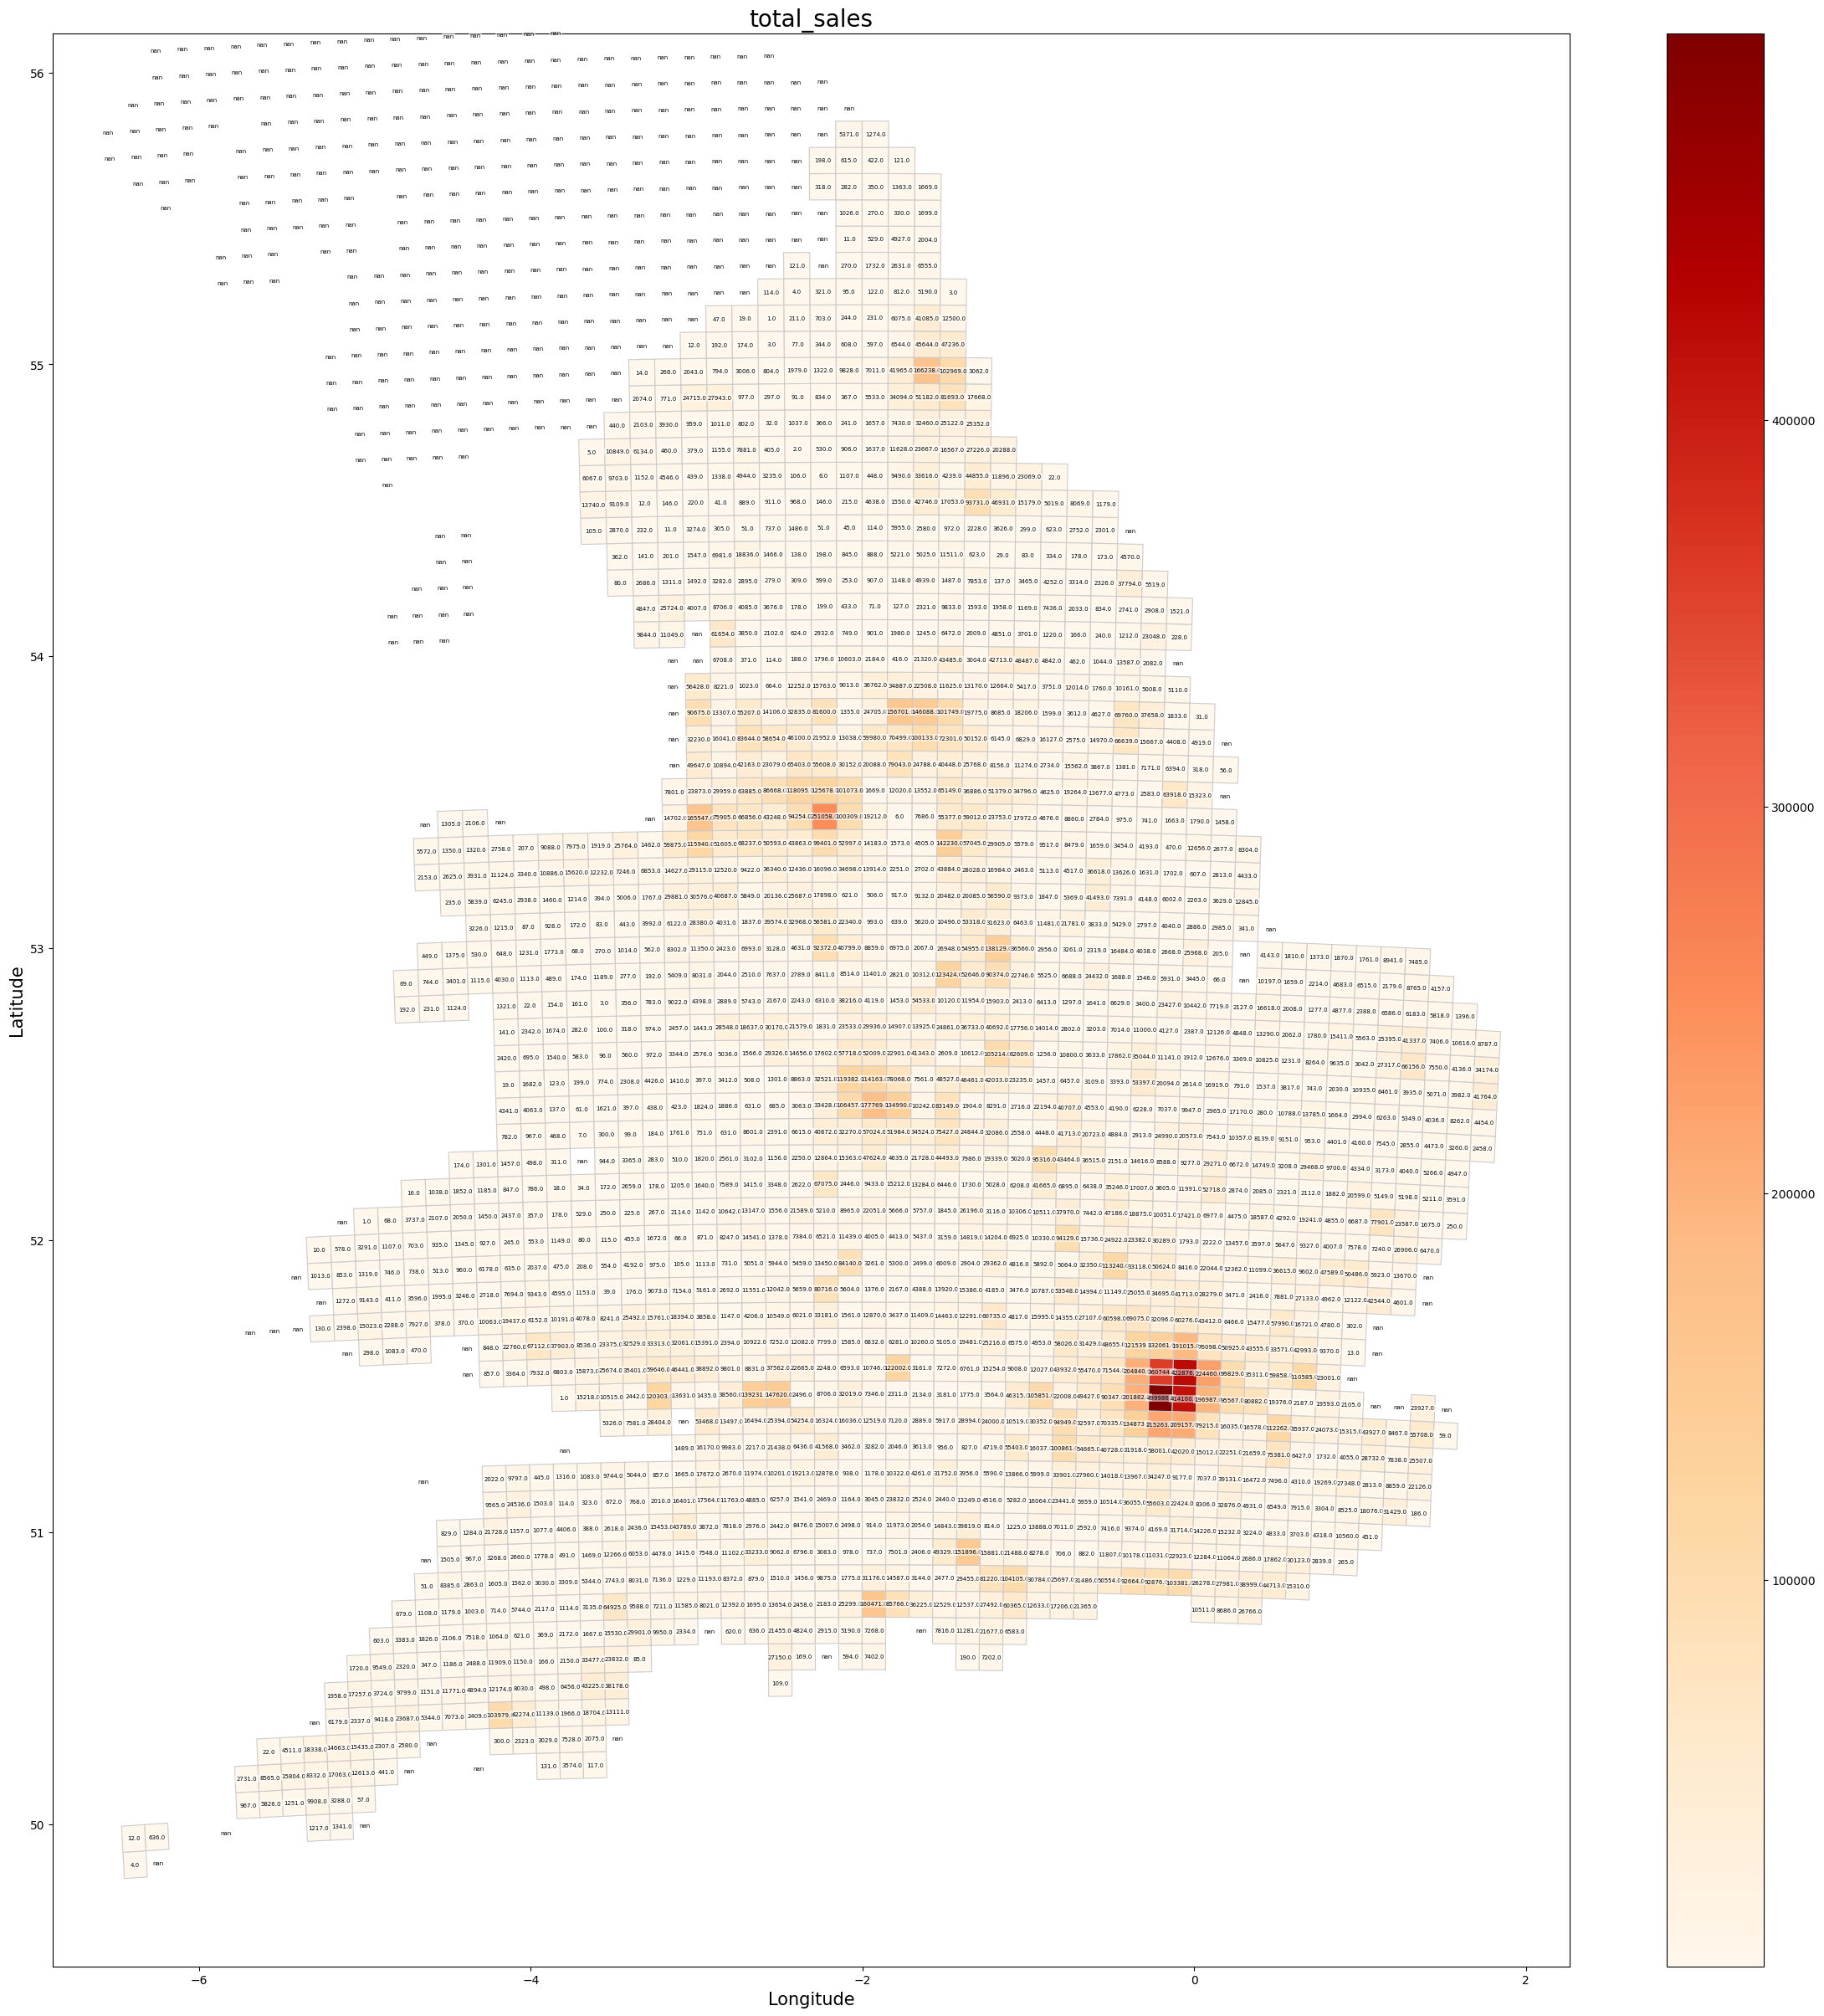

In [410]:
fig, ax = plt.subplots(1, 1, figsize=(30, 30))
merged_gdf.plot(column='total_sales', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
#merged_gdf.plot(column='REGION', ax=ax, legend=True, cmap='Set3', edgecolor='k', linewidth=0.8)
ax.set_title('total_sales', fontdict={'fontsize': '20', 'fontweight': '5'})
ax.set_xlabel('Longitude', fontsize=15)
ax.set_ylabel('Latitude', fontsize=15)


for idx, row in merged_gdf.iterrows():
    offset = offsets.get(row.name, (0, 0))
    plt.annotate(
        text=f"{row.total_sales}",
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        xytext=offset,
        textcoords='offset points',
        ha='center',
        va='center',
        fontsize=5,
        color='black',
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=1)
    )



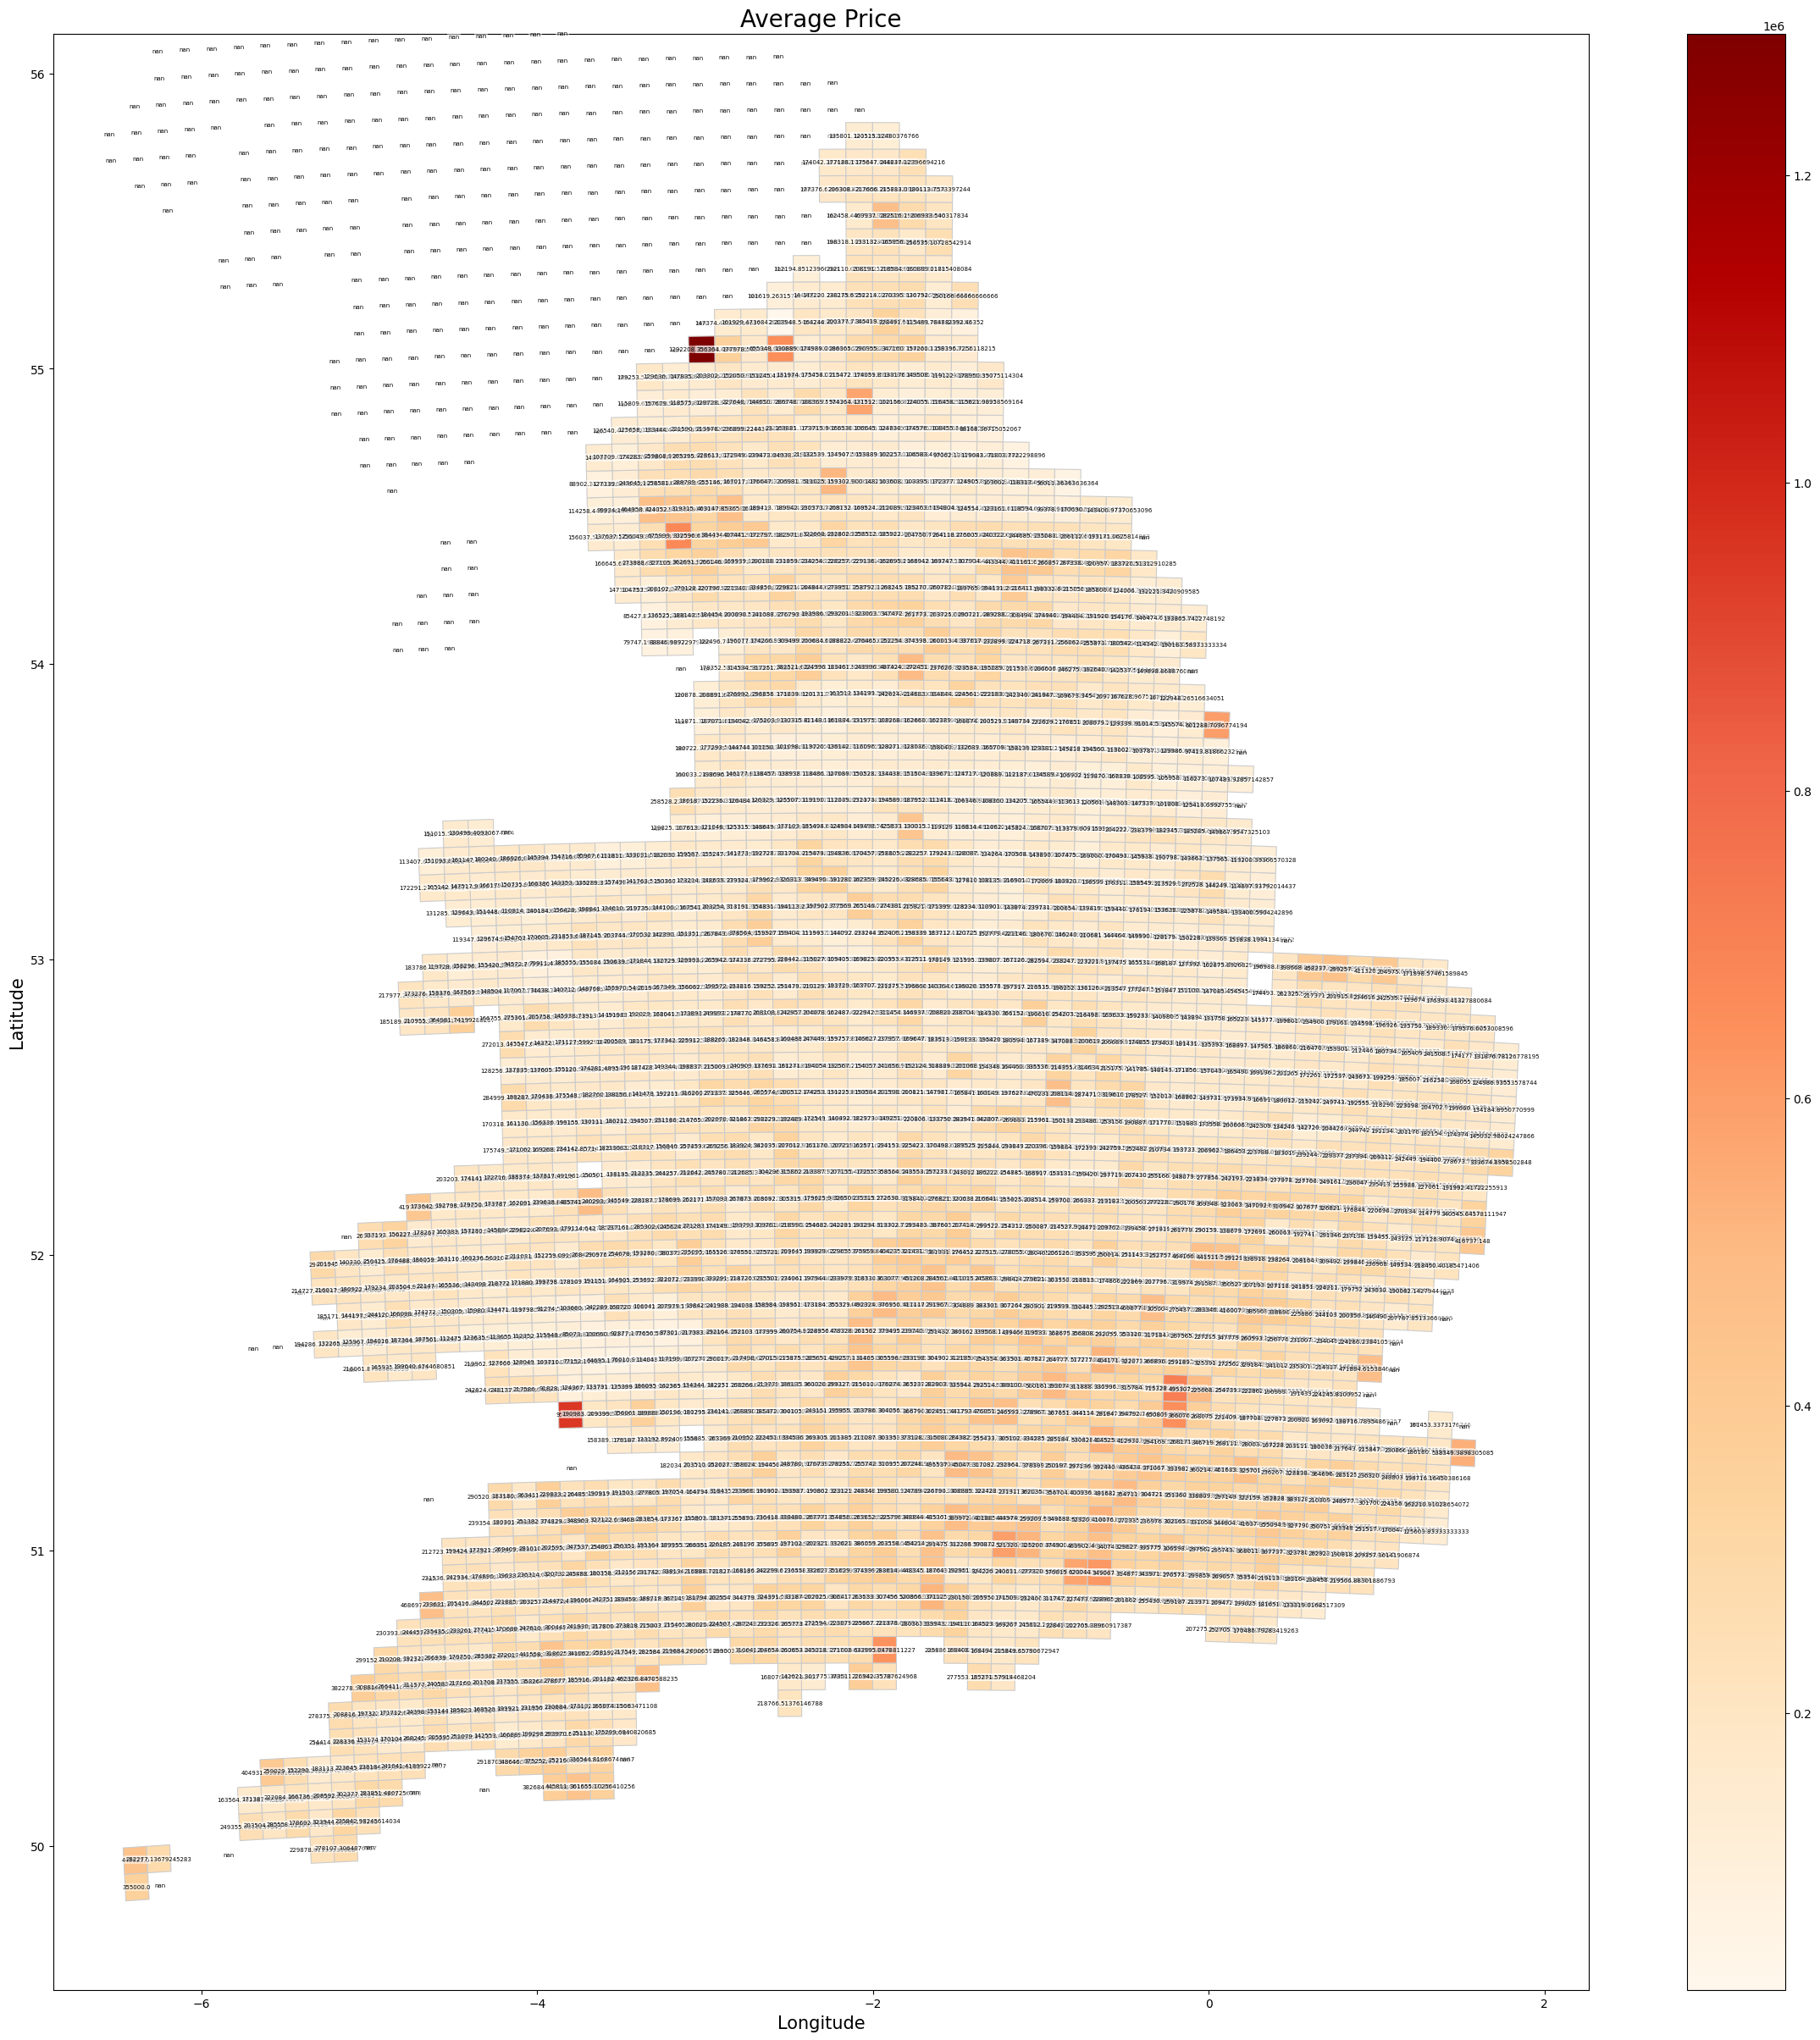

In [411]:
fig, ax = plt.subplots(1, 1, figsize=(30, 30))
merged_gdf.plot(column='Average_Price', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
#merged_gdf.plot(column='REGION', ax=ax, legend=True, cmap='Set3', edgecolor='k', linewidth=0.8)
ax.set_title('Average Price', fontdict={'fontsize': '20', 'fontweight': '5'})
ax.set_xlabel('Longitude', fontsize=15)
ax.set_ylabel('Latitude', fontsize=15)


for idx, row in merged_gdf.iterrows():
    offset = offsets.get(row.name, (0, 0))
    plt.annotate(
        text=f"{row.Average_Price}",
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        xytext=offset,
        textcoords='offset points',
        ha='center',
        va='center',
        fontsize=5,
        color='black',
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=1)
    )



In [412]:
def determine_region(row):
    if row['ENGLAND'] == 't':  # Assuming '1' indicates presence
        return 'England'
    elif row['SCOTLAND'] == 't':  # Assuming '1' indicates presence
        return 'Scotland'
    elif row['WALES'] == 't':  # Assuming '1' indicates presence
        return 'Wales'
    else:
        return 'Other'

merged_gdf['REGION'] = merged_gdf.apply(determine_region, axis=1)


bounds = [[49.5, -10.5], [61, 2]]  # Approximate bounds for the UK



# Create a folium map centered around the bounds of the UK
m = folium.Map(location=[55, -3], zoom_start=6, max_bounds=True, tiles='CartoDB positron')
m.fit_bounds(bounds)

# Add polygons to the map
folium.GeoJson(
    merged_gdf.to_json(),
    name='Polygons',
    style_function=lambda x: {

        'weight': 1,
        'fillOpacity': 0.1,
    },
    tooltip=folium.GeoJsonTooltip(fields=['TILE_NAME', 'total_sales','Average_Price'])
).add_to(m)

# Prepare data for heat map
heat_data = [[point.xy[1][0], point.xy[0][0], row['total_sales']]
             for index, row in merged_gdf.iterrows()
             for point in [row['geometry'].centroid]
             if not pd.isnull(row['total_sales'])]

# Add heat map
HeatMap(heat_data).add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

# Save the map to an HTML file and display it
m.save('map.html')
m

# Exercise 9

In [ ]:
def determine_region(row):
    if row['ENGLAND'] == 't':  # Assuming '1' indicates presence
        return 'England'
    elif row['SCOTLAND'] == 't':  # Assuming '1' indicates presence
        return 'Scotland'
    elif row['WALES'] == 't':  # Assuming '1' indicates presence
        return 'Wales'
    else:
        return 'Other'

gdf1['REGION'] = gdf1.apply(determine_region, axis=1)

# Plotting the GeoDataFrame with different colors for each region
fig, ax = plt.subplots(figsize=(10, 10))
gdf1.plot(column='REGION', ax=ax, legend=True, cmap='Set3', edgecolor='k')

# Setting title and labels
ax.set_title('10km Map of England, Scotland, and Wales')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Plot the first five geometries
gdf1.head(2).plot()
plt.title('First Five Geometries')
plt.show()


In [ ]:
gdf1.loc[1,'geometry']

gdf1.loc[[1]].plot()
plt.title('Polygon for Record 0')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
weekly_sales= backup_weekly_sales.copy()

In [ ]:
from statsmodels.tsa.stattools import adfuller
weekly_sales= backup_weekly_sales.copy()

weekly_sales = weekly_sales.drop('Sales_MA', axis=1)
# Set the index to Week_Start for time series analysis
weekly_sales.set_index('Week_Start', inplace=True)

# Perform the Augmented Dickey-Fuller test
result = adfuller(weekly_sales['Sales_Count'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])


In [ ]:
import matplotlib.pyplot as plt

# Plot with EPSG:4326
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

gdf_4326 = gdf1.to_crs(epsg=4326)
gdf_4326.plot(ax=ax[0], edgecolor='k')
ax[0].set_title('WGS 84 (EPSG:4326)')

# Plot with EPSG:27700
gdf_27700 = gdf1.to_crs(epsg=27700)
gdf_27700.plot(ax=ax[1], edgecolor='k')
ax[1].set_title('British National Grid (EPSG:27700)')

plt.show()


In [ ]:
weekly_sales['Sales_Count_Diff'] = weekly_sales['Sales_Count'].diff().dropna()

In [ ]:
import itertools
import warnings
warnings.filterwarnings("ignore")

p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in pdq]

best_aic = float("inf")
best_pdq = None
best_seasonal_pdq = None
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(weekly_sales['Sales_Count'], order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            continue

print(f'Best ARIMA Parameters: {best_pdq} with seasonal {best_seasonal_pdq}')

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

weekly_sales= backup_weekly_sales.copy()

weekly_sales = weekly_sales.drop('Sales_MA', axis=1)
# Set the index to Week_Start for time series analysis
weekly_sales.set_index('Week_Start', inplace=True)


# Fit the ARIMA model (order parameters can be tuned)
arima_model = ARIMA(weekly_sales['Sales_Count'], order=(5, 1, 2))
arima_result = arima_model.fit()

# Forecast future sales

# Forecast future sales
forecast = arima_result.get_forecast(steps=52)  # Forecast for one year
forecast_index = pd.date_range(start=weekly_sales.index[-1], periods=52, freq='W-MON')
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

# Plot the original data and forecast
plt.figure(figsize=(14, 7))
plt.plot(weekly_sales['Sales_Count'], label='Observed')
plt.plot(forecast_series, color='red', label='Forecast')
plt.title('Sales Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Load the data (assuming weekly_sales DataFrame with 'Week_Start' as datetime and 'Sales_Count')
weekly_sales = backup_weekly_sales.copy()
weekly_sales = weekly_sales.drop('Sales_MA', axis=1)
weekly_sales = weekly_sales.join(avg_price_per_week['Average_Price'], how='left')

weekly_sales.set_index('Week_Start', inplace=True)
weekly_sales

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

endog = weekly_sales['Sales_Count']
exog = weekly_sales[['Average_Price']]

# Fit the SARIMA model on the training set
sarima_model = SARIMAX(endog, exog=exog, order=(2, 1, 2), seasonal_order=(1, 1, 1, 52))
sarima_result = sarima_model.fit(disp=False)


# Forecast future sales with exogenous variables
forecast_steps = 52  # Forecast for one year
future_exog = exog.iloc[-1:].append(pd.DataFrame({'Average_Price': exog['Average_Price'].iloc[-1]}, index=pd.date_range(start=exog.index[-1] + pd.Timedelta(weeks=1), periods=forecast_steps, freq='W-MON')))

forecast = sarima_result.get_forecast(steps=forecast_steps, exog=future_exog)
forecast_index = pd.date_range(start=weekly_sales.index[-1] + pd.Timedelta(weeks=1), periods=forecast_steps, freq='W-SUN')
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)
forecast_ci = forecast.conf_int()

# Plot the original data and forecast
plt.figure(figsize=(14, 7))
plt.plot(weekly_sales['Sales_Count'], label='Observed')
plt.plot(forecast_series, color='red', label='Forecast')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Sales Forecast using SARIMA with Exogenous Variable (Average Price)')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the forecasted values for verification
print(forecast_series)


In [ ]:
# Diagnose the model
print(sarima_result.summary())
residuals = sarima_result.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.show()

# Plot ACF of residuals to check if they resemble white noise
plot_acf(residuals, lags=50)
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMA model (with seasonal components if necessary)
sarima_model = SARIMAX(weekly_sales['Sales_Count'], order=(2, 1, 2), seasonal_order=(1, 1, 1, 52))
sarima_result = sarima_model.fit(disp=False)

# Forecast future sales
forecast_steps = 52  # Forecast for one year
forecast = sarima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=weekly_sales.index[-1] + pd.Timedelta(weeks=1), periods=forecast_steps, freq='W-MON')
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)
forecast_ci = forecast.conf_int()

# Plot the original data and forecast
plt.figure(figsize=(14, 7))
plt.plot(weekly_sales['Sales_Count'], label='Observed')
plt.plot(forecast_series, color='red', label='Forecast')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Sales Forecast using SARIMA')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Diagnose the model
print(sarima_result.summary())
residuals = sarima_result.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.show()

# Plot ACF of residuals to check if they resemble white noise
plot_acf(residuals, lags=50)
plt.show()

In [ ]:
train

In [ ]:
# Split the data into train and test sets
train_size = int(len(weekly_sales) * 0.8)
train, test = weekly_sales.iloc[:train_size], weekly_sales.iloc[train_size:]


# Fit the SARIMA model on the training set
sarima_model = SARIMAX(train['Sales_Count'], order=(3, 1, 2), seasonal_order=(1, 1, 1, 52))
sarima_result = sarima_model.fit(disp=False)

# Forecast the test set
forecast_steps = len(test)
forecast = sarima_result.get_forecast(steps=forecast_steps)
forecast_index = test.index
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)
forecast_ci = forecast.conf_int()

# Plot the train, test, and forecast
plt.figure(figsize=(14, 7))
plt.plot(train['Sales_Count'], label='Train')
plt.plot(test['Sales_Count'], label='Test', color='orange')
plt.plot(forecast_series, color='red', label='Forecast')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Train/Test Split with SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print forecast accuracy metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(test['Sales_Count'], forecast_series)
mae = mean_absolute_error(test['Sales_Count'], forecast_series)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')


In [ ]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

weekly_sales= backup_weekly_sales.copy()
weekly_sales = weekly_sales.drop('Sales_MA', axis=1)
weekly_sales.set_index('Week_Start', inplace=True)

# Define the p, d, q parameters to take any value between 0 and 2
p = d = q = range(0, 3)
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))
# Generate all different combinations of seasonal p, d and q triplets with seasonal period 52
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in pdq]

best_aic = float("inf")
best_pdq = None
best_seasonal_pdq = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(weekly_sales['Sales_Count'], order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            continue

print(f'Best ARIMA Parameters: {best_pdq} with seasonal {best_seasonal_pdq}')


In [ ]:
def is_in_range(laua):
    try:
        # Extract the numeric part and convert to integer
        laua_num = int(laua[1:])
        # Check if it is within the range
        return 9000001 <= laua_num <= 9000033
    except ValueError:
        return False

# Apply the function to the 'laua' column
filtered_nspl_df = nspl_df[nspl_df['laua'].apply(is_in_range)]

# Display the filtered DataFrame
print("Records where 'laua' values are between E09000001 and E09000033:")
print(filtered_nspl_df)

In [ ]:
df.info()

In [ ]:
df_bacckup = df.copy()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df[df['Price']>8.0e+08]

In [ ]:
filtered = df[
    (df['Postcode'] == 'TN23 7HE')

]

In [ ]:
filtered

In [ ]:
 Category_B = df[df['PPD_Category_Type']=='B']
 Category_B_sorted = Category_B.sort_values(by='Date_of_Transfer')

In [ ]:
Category_B['PPD_Category_Type'].value_counts()

In [ ]:
cutoff_date = pd.Timestamp('2013-10-01')
Category_B_sorted[Category_B_sorted['Date_of_Transfer'] < cutoff_date]

In [ ]:
categorical_columns = [
    'Property_Type',
    'Old/New',
    'Duration',
    'PPD_Category_Type',
    'Record_Status_monthly_file_only'
]

Address_columns = [
    'SAON',
    'PAON',
    'Street',
    'Locality',
    'Town/City',
    'District',
    'County',
    'Postcode'
]

Transaction_columns = [
    'Transaction_unique_identifier',
    'Price',
    'Date_of_Transfer'
]

In [ ]:
duplicate = df[df.duplicated(subset=['SAON',
    'Property_Type',
    'Old/New',
    'Duration',
    'PPD_Category_Type',
    'PAON',
    'Street',
    'Locality',
    'Town/City',
    'District',
    'County',
    'Postcode',
    'Date_of_Transfer'], keep=False)]

In [ ]:
duplicate

In [ ]:
# Define the specific values to check
record_to_check = {
    'SAON': 'APARTMENT 5',
    'PAON': '100',
    'Street': 'SILLAVAN WAY',
    'Locality': pd.NA,
    'Town/City': 'BARNET',
    'District': 'BARNET',
    'County': 'GREATER MANCHESTER',
    'Postcode': 'CF63 1BB'
}

In [ ]:
# Filter the DataFrame for the specific record
filtered_df = df[
    (df['Town/City'] == record_to_check['Town/City'])
]

# Display the filtered DataFrame
print("Records matching the specified values:")
filtered_df

In [ ]:
duplicate_rows = address_df.duplicated()

In [ ]:
duplicate_entries = df[df.duplicated(subset=['Date_of_Transfer', 'Postcode','SAON', 'PAON','Street','Locality','Town/City','District','County', 'Property_Type', 'Old/New', 'Price'], keep=False)]
print("Potential duplicate records:")
duplicate_entries

In [ ]:
inconsistencies = df[(df['Old/New'] == 'N') & (df['Date_of_Transfer'] < '2000-01-01')]
print("Potential inconsistent records:")
inconsistencies

In [ ]:
df[dup]

In [ ]:
duplicated_df = df[duplicate_rows]

In [ ]:
duplicated_df['Duration'].value_counts()

In [ ]:
# Function to standardize string comparison
def standardize_string(s):
    if pd.isna(s):
        return s
    return str(s).strip().upper()

# Apply the function to the DataFrame and the record to check
for key in record_to_check.keys():
    df[key] = df[key].apply(standardize_string)
    record_to_check[key] = standardize_string(record_to_check[key])

In [ ]:
lease_houses = df[df['Duration'] == 'L']

# Find duplicate addresses and calculate the date difference
lease_houses_sorted = lease_houses.sort_values(by=['PAON', 'SAON', 'Postcode', 'Date_of_Transfer'])
lease_houses_sorted['Date_Diff_Days'] = lease_houses_sorted.groupby(['PAON', 'SAON', 'Postcode'])['Date_of_Transfer'].diff().dt.days

# Display the DataFrame with the new 'Date_Diff_Days' column
print("Lease houses with date difference in days:")
lease_houses_sorted

In [ ]:
lease_houses_sorted[lease_houses_sorted['Date_Diff_Days']<2555]

In [ ]:
grouped_duplicates = duplicates.groupby(Address_columns).size().reset_index(name='Counts')

In [ ]:
grouped_duplicates1 = grouped_duplicates[grouped_duplicates['Counts'] > 1]
grouped_duplicates1

In [ ]:
plt.figure(figsize=(20, 10))

# Loop through the categorical columns and plot the value counts
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(y=df[column], order=df[column].value_counts().index)
    plt.title(f'Value Counts of {column}')
    plt.xlabel('Counts')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [ ]:
df['Duration'].value_counts()

In [ ]:
df['Old/New'].value_counts()

In [ ]:
print(len(df))
df['unknown'].value_counts()

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df.isna().sum()

In [ ]:
df1 = df.copy()

In [ ]:
df1['Price'].describe()

In [ ]:
df1[df1['Price']<100]

In [ ]:
duplicated_transactions = df1[df1.duplicated(subset=['Transaction_unique_identifier'], keep=False)]

# Check if there are any duplicates and display them
if not duplicated_transactions.empty:
    print("Duplicates found in Transaction unique identifier:")
    print(duplicated_transactions)
else:
    print("No duplicates found in Transaction unique identifier.")

In [ ]:
duplicate_entries = df1[df1.duplicated(subset=["PAON","SAON","Street","Locality","Town/City","District","County","Postcode"], keep=False)]
print("Potential duplicate records:")
print(duplicate_entries)

In [ ]:
gdf1 = gpd.read_file('/content/drive/MyDrive/Chimnie/OSGB_Grids-master/GeoJSON/OSGB_Grid_10km.geojson')

In [ ]:
gdf1.info()

In [ ]:
print(gdf1.crs)

In [ ]:
def determine_region(row):
    if row['ENGLAND'] == 't':  # Assuming '1' indicates presence
        return 'England'
    elif row['SCOTLAND'] == 't':  # Assuming '1' indicates presence
        return 'Scotland'
    elif row['WALES'] == 't':  # Assuming '1' indicates presence
        return 'Wales'
    else:
        return 'Other'

gdf1['REGION'] = gdf1.apply(determine_region, axis=1)

# Plotting the GeoDataFrame with different colors for each region
fig, ax = plt.subplots(figsize=(10, 10))
gdf1.plot(column='REGION', ax=ax, legend=True, cmap='Set3', edgecolor='k')

# Setting title and labels
ax.set_title('10km Map of England, Scotland, and Wales')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show plot
plt.show()